# Исследование рынка продажи недвидимости в Санкт-Петербурге и Ленинградской области

---
<a id='contens'></a> 
# Оглавление
1. [Цель проекта](#goal)
2. [Задачи проекта](#task)
3. [Описание данных](#data_name)
4. [Импорт библиотек](#import_bibl)
5. [Функции](#function)
6. [Загрузка данных и изучение общей информации](#import)
7. [Предобработка данных](#preprocessing)\
    7.1 [Переименование колонок](#rename_columns)\
    7.2 [Изучение пропусков](#pass)\
    7.3 [Изменение типа данных](#change_types)\
    7.4 [Проверка на наличие дубликатов](#check_dubl)\
    7.5 [Исследование аномалий в данных](#anomaly)\
    7.6 [Дополнительные расчеты](#add_column)
8. [Исследовательский анализ данных](#eda)\
    8.1 [Изучение параметров основных объектов](#eda1)\
    8.2 [Изучение скорости продажи квартир](#eda2)\
    8.3 [Анализ факторов влияния на стоимость объектов](#eda3)\
9. [Выводы и рекомендации](#conclution)

---
<a id='customer'></a> 
## Заказчик
[Назад к оглавлению](#contens)

---
<a id='goal'></a> 
## Цель проекта
[Назад к оглавлению](#contens)

На основе выборки данных сервиса Яндекс.Недвижимость проанализировать влияние различных факторов на среднюю цену объектов недвижимости, расположенных в Санкт-Петербурге и Ленинградской области.

---
<a id='task'></a> 
## Задачи проекта
[Назад к оглавлению](#contens)

- Провести предобработку данных (пропуски, дубликаты, типы данных, аномальные значения);
- Рассчитать дополнительные значения;
- Изучить параметры объектов;
- Проанализировать скорость продажи квартир;
- Рассчитать среднюю цены 1 кв.м. в 10 населенных пунктах с наибольшим числом объявлений;
- Вычислить среднюю стоимость каждого километра.

---
<a id='data_name'></a> 
## Описание данных
[Назад к оглавлению](#contens)

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

---
<a id='import_bibl'></a> 
## Импорт библиотек
[Назад к оглавлению](#contens)

In [135]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import set_matplotlib_formats
import scipy.stats as st
import warnings; warnings.filterwarnings(action = 'ignore')

In [136]:
# добавим опции для отображения таблиц и данных
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format ='{:,.2f}'.format
warnings.simplefilter(action='ignore', category=FutureWarning)

In [137]:
# добавим настройки для диагмрамм
sns.set_style('dark')
custom_palette = ['#16537e', '#cfe2f3', '#9fc5e8', '#6fa8dc', '#3d85c6', '#0b5394', '#073763', '#62a7d7',
                 '#9dbbd5', '#7b95ac', '#697c8c', '#b1d5f5', '#246cac', '#204e77', '#76a5af']
sns.set_palette(custom_palette)
sns.set_context('notebook') 

---
<a id='function'></a> 
## Функции
[Назад к оглавлению](#contens)

---
<a id='df_study'></a> 
### Функция df_study
[Назад к оглавлению](#contens)\
[Перейти к месту использования функции в проекте](#df_study_use)

In [138]:
# напишем функцию для изучения основных характеристик датафрейма
def df_study(df):
      
    # изучим начало и конец выборки
    display(df.head(10), df.tail(10))

    # изучим информацию о датафрейме
    display(df.info())
    
    # изучим статистические показатели
    display(df.describe())
    
    print('-'*50)
    # изучим количество строк и столбцов
    print('Количество строк и столбцов:', df.shape)   

    print('-'*50)
    # посчитаем количество явных дубликатов
    dubl = df.duplicated().sum()
    print('Количество явных дубликатов:' , dubl)
    
    # посчитаем долю дубликатов
    dubl_share = dubl/len(df)
    print(f'Доля явных дубликатов: {dubl_share:.2%}')
    
    print('-'*50)
    # посчитаем количество пропусков
    gap = df.isna().sum()
    print('Количество пропусков:', gap)
    
    # посчитаем долю пропусков
    gap_share = ((df.isnull().sum().sort_values(ascending=False)/df.shape[0])*100).round(2)
    print()
    print('Доля пропусков:')
    display(gap_share)
    
    # зададим масимальную ширину столбца
    pd.set_option('max_colwidth', 100) 

---
<a id='quantity_plot'></a> 
### Функция quantity_plot
[Назад к оглавлению](#contens)\
[Перейти к месту использования функции в проекте](#quantity_plot_use)

In [139]:
# функция для диаграмм количественных признаков
def quantity_plot(df, column, name):
    
    plt.figure(figsize=(16, 6))

    # 1 график -  столбчатая диаграмма
    sns.histplot(df[column], ax = plt.subplot(1, 2, 1), stat='density', common_norm=False)
    plt.xlabel(name)
    plt.ylabel('Количество квартир, тыс. шт.')
       
    # 2 график - диаграмма размаха
    sns.boxplot(y=column, data=df, ax=plt.subplot(1, 2, 2))
    plt.ylabel(name)
    
    plt.suptitle(name + ' (' + column + ')')
    plt.tight_layout()
    plt.show()

---
<a id='import'></a> 
## Загрузка данных и изучение общей информации
[Назад к оглавлению](#contens)

In [140]:
# загружаем файл
try:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

<a id='df_study_use'></a> 
Для изучения датафрейма используем написанную функцию.\
[Перейти к функции](#df_study)

In [141]:
# изучим основную информацию
df_study(df)

total_images    last_price  total_area first_day_exposition  rooms  \
0            20 13,000,000.00      108.00  2019-03-07T00:00:00      3   
1             7  3,350,000.00       40.40  2018-12-04T00:00:00      1   
2            10  5,196,000.00       56.00  2015-08-20T00:00:00      2   
3             0 64,900,000.00      159.00  2015-07-24T00:00:00      3   
4             2 10,000,000.00      100.00  2018-06-19T00:00:00      2   
5            10  2,890,000.00       30.40  2018-09-10T00:00:00      1   
6             6  3,700,000.00       37.30  2017-11-02T00:00:00      1   
7             5  7,915,000.00       71.60  2019-04-18T00:00:00      2   
8            20  2,900,000.00       33.16  2018-05-23T00:00:00      1   
9            18  5,400,000.00       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70         16.00        51.00      8          NaN   False   
1             NaN         11.00        18.60      1          NaN   False   
2             NaN          5.00        34.30      4          NaN   False   
3             NaN         14.00          NaN      9          NaN   False   
4            3.03         14.00        32.00     13          NaN   False   
5             NaN         12.00        14.40      5          NaN   False   
6             NaN         26.00        10.60      6          NaN   False   
7             NaN         24.00          NaN     22          NaN   False   
8             NaN         27.00        15.43     26          NaN   False   
9            2.50          9.00        43.60      7          NaN   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False         25.00      NaN            Санкт-Петербург   
1      False         11.00     2.00             посёлок Шушары   
2      False          8.30     0.00            Санкт-Петербург   
3      False           NaN     0.00            Санкт-Петербург   
4      False         41.00      NaN            Санкт-Петербург   
5      False          9.10      NaN  городской посёлок Янино-1   
6      False         14.40     1.00          посёлок Парголово   
7      False         18.90     2.00            Санкт-Петербург   
8      False          8.81      NaN             посёлок Мурино   
9      False          6.50     2.00            Санкт-Петербург   

   airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
0         18,863.00            16,028.00              1.00         482.00   
1         12,817.00            18,603.00              0.00            NaN   
2         21,741.00            13,933.00              1.00          90.00   
3         28,098.00             6,800.00              2.00          84.00   
4         31,856.00             8,098.00              2.00         112.00   
5               NaN                  NaN               NaN            NaN   
6         52,996.00            19,143.00              0.00            NaN   
7         23,982.00            11,634.00              0.00            NaN   
8               NaN                  NaN               NaN            NaN   
9         50,898.00            15,008.00              0.00            NaN   

   ponds_around3000  ponds_nearest  days_exposition  
0              2.00         755.00              NaN  
1              0.00            NaN            81.00  
2              2.00         574.00           558.00  
3              3.00         234.00           424.00  
4              1.00          48.00           121.00  
5               NaN            NaN            55.00  
6              0.00            NaN           155.00  
7              0.00            NaN              NaN  
8               NaN            NaN           189.00  
9              0.00            NaN           289.00

total_images    last_price  total_area first_day_exposition  rooms  \
23689            13  3,550,000.00       35.30  2018-02-28T00:00:00      1   
23690             3  5,500,000.00       52.00  2018-07-19T00:00:00      2   
23691            11  9,470,000.00       72.90  2016-10-13T00:00:00      2   
23692             2  1,350,000.00       30.00  2017-07-07T00:00:00      1   
23693             9  4,600,000.00       62.40  2016-08-05T00:00:00      3   
23694             9  9,700,000.00      133.81  2017-03-21T00:00:00      3   
23695            14  3,100,000.00       59.00  2018-01-15T00:00:00      3   
23696            18  2,500,000.00       56.70  2018-02-11T00:00:00      2   
23697            13 11,475,000.00       76.75  2017-03-28T00:00:00      2   
23698             4  1,350,000.00       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
23689            2.86         15.00        16.30      4          NaN   False   
23690             NaN          5.00        31.00      2          NaN   False   
23691            2.75         25.00        40.30      7          NaN   False   
23692             NaN          5.00        17.50      4          NaN   False   
23693            2.60          9.00        40.00      8          NaN   False   
23694            3.70          5.00        73.30      3          NaN   False   
23695             NaN          5.00        38.00      4          NaN   False   
23696             NaN          3.00        29.70      1          NaN   False   
23697            3.00         17.00          NaN     12          NaN   False   
23698            2.50          5.00        12.30      1          NaN   False   

       open_plan  kitchen_area  balcony        locality_name  \
23689      False          9.10     2.00      Санкт-Петербург   
23690      False          6.00      NaN      Санкт-Петербург   
23691      False         10.60     1.00      Санкт-Петербург   
23692      False          6.00      NaN               Тихвин   
23693      False          8.00     0.00             Петергоф   
23694      False         13.83      NaN      Санкт-Петербург   
23695      False          8.50      NaN                Тосно   
23696      False           NaN      NaN     село Рождествено   
23697      False         23.30     2.00      Санкт-Петербург   
23698      False          9.00      NaN  поселок Новый Учхоз   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
23689         17,284.00            16,081.00              1.00         353.00   
23690         20,151.00             6,263.00              1.00         300.00   
23691         19,424.00             4,489.00              0.00            NaN   
23692               NaN                  NaN               NaN            NaN   
23693         45,602.00            34,104.00              1.00         352.00   
23694         24,665.00             4,232.00              1.00         796.00   
23695               NaN                  NaN               NaN            NaN   
23696               NaN                  NaN               NaN            NaN   
23697         39,140.00            10,364.00              2.00         173.00   
23698               NaN                  NaN               NaN            NaN   

       ponds_around3000  ponds_nearest  days_exposition  
23689              2.00         652.00            29.00  
23690              0.00            NaN            15.00  
23691              1.00         806.00           519.00  
23692               NaN            NaN           413.00  
23693              1.00         675.00           239.00  
23694              3.00         381.00              NaN  
23695               NaN            NaN            45.00  
23696               NaN            NaN              NaN  
23697              3.00         196.00           602.00  
23698               NaN            NaN              NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

total_images     last_price  total_area     rooms  ceiling_height  \
count     23,699.00      23,699.00   23,699.00 23,699.00       14,504.00   
mean           9.86   6,541,548.77       60.35      2.07            2.77   
std            5.68  10,887,013.27       35.65      1.08            1.26   
min            0.00      12,190.00       12.00      0.00            1.00   
25%            6.00   3,400,000.00       40.00      1.00            2.52   
50%            9.00   4,650,000.00       52.00      2.00            2.65   
75%           14.00   6,800,000.00       69.90      3.00            2.80   
max           50.00 763,000,000.00      900.00     19.00          100.00   

       floors_total  living_area     floor  kitchen_area   balcony  \
count     23,613.00    21,796.00 23,699.00     21,421.00 12,180.00   
mean          10.67        34.46      5.89         10.57      1.15   
std            6.60        22.03      4.89          5.91      1.07   
min            1.00         2.00      1.00          1.30      0.00   
25%            5.00        18.60      2.00          7.00      0.00   
50%            9.00        30.00      4.00          9.10      1.00   
75%           16.00        42.30      8.00         12.00      2.00   
max           60.00       409.70     33.00        112.00      5.00   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
count         18,157.00            18,180.00         18,181.00       8,079.00   
mean          28,793.67            14,191.28              0.61         490.80   
std           12,630.88             8,608.39              0.80         342.32   
min                0.00               181.00              0.00           1.00   
25%           18,585.00             9,238.00              0.00         288.00   
50%           26,726.00            13,098.50              0.00         455.00   
75%           37,273.00            16,293.00              1.00         612.00   
max           84,869.00            65,968.00              3.00       3,190.00   

       ponds_around3000  ponds_nearest  days_exposition  
count         18,181.00       9,110.00        20,518.00  
mean               0.77         517.98           180.89  
std                0.94         277.72           219.73  
min                0.00          13.00             1.00  
25%                0.00         294.00            45.00  
50%                1.00         502.00            95.00  
75%                1.00         729.00           232.00  
max                3.00       1,344.00         1,580.00

--------------------------------------------------
Количество строк и столбцов: (23699, 22)
--------------------------------------------------
Количество явных дубликатов: 0
Доля явных дубликатов: 0.00%
--------------------------------------------------
Количество пропусков: total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Доля пропусков:


is_apartment           88.29
parks_nearest          65.91
ponds_nearest          61.56
balcony                48.61
ceiling_height         38.80
airports_nearest       23.38
cityCenters_nearest    23.29
ponds_around3000       23.28
parks_around3000       23.28
days_exposition        13.42
kitchen_area            9.61
living_area             8.03
floors_total            0.36
locality_name           0.21
total_images            0.00
last_price              0.00
studio                  0.00
floor                   0.00
rooms                   0.00
first_day_exposition    0.00
total_area              0.00
open_plan               0.00
dtype: float64

---
Всего в датафрейме 23699 записи. 

Обнаруженные проблемы:
- для целого ряда столбцов большое количество пропусков данных;
- некорректный тип данных для некоторых столбцов;
- наличие аномальных значений;
- неудобная группировка (расположение) столцов в датасете;
- прыгающий регистр в названии столбцов.

Необходима предобработка данных и более точная проверка на наличие дубликатов.

---
<a id='preprocessing'></a> 
## Предобработка данных
[Назад к оглавлению](#contens)

---
<a id='rename_columns'></a> 
### Переименование колонок
[Назад к оглавлению](#contens)

In [142]:
# переименуем некоторые столбцы
df = df.rename(
    columns ={
        'cityCenters_nearest': 'city_centers_nearest_m',
        'parks_around3000' : 'parks_around_3km',
        'ponds_around3000' : 'ponds_around_3km',
        'studio' : 'is_studio',
        'open_plan' : 'is_open_plan'
    })

In [143]:
# поменяем некоторые столцы местами для более удобного анализа
df = df[['locality_name',
         'total_area',
         'living_area',
         'kitchen_area',
         'rooms',
         'floor',
         'balcony',
         'is_apartment',
         'is_open_plan',
         'is_studio',
         'floors_total',
         'ceiling_height',
         'last_price',
         'total_images',
         'first_day_exposition',
         'days_exposition',
         'airports_nearest',
         'city_centers_nearest_m',
         'parks_around_3km',
         'parks_nearest',
         'ponds_around_3km',
         'ponds_nearest']]

In [144]:
# проверяем, что столбцы переименованы и переставлены
display(df.columns.tolist())
df.head()

['locality_name',
 'total_area',
 'living_area',
 'kitchen_area',
 'rooms',
 'floor',
 'balcony',
 'is_apartment',
 'is_open_plan',
 'is_studio',
 'floors_total',
 'ceiling_height',
 'last_price',
 'total_images',
 'first_day_exposition',
 'days_exposition',
 'airports_nearest',
 'city_centers_nearest_m',
 'parks_around_3km',
 'parks_nearest',
 'ponds_around_3km',
 'ponds_nearest']

locality_name  total_area  living_area  kitchen_area  rooms  floor  \
0  Санкт-Петербург      108.00        51.00         25.00      3      8   
1   посёлок Шушары       40.40        18.60         11.00      1      1   
2  Санкт-Петербург       56.00        34.30          8.30      2      4   
3  Санкт-Петербург      159.00          NaN           NaN      3      9   
4  Санкт-Петербург      100.00        32.00         41.00      2     13   

   balcony is_apartment  is_open_plan  is_studio  floors_total  \
0      NaN          NaN         False      False         16.00   
1     2.00          NaN         False      False         11.00   
2     0.00          NaN         False      False          5.00   
3     0.00          NaN         False      False         14.00   
4      NaN          NaN         False      False         14.00   

   ceiling_height    last_price  total_images first_day_exposition  \
0            2.70 13,000,000.00            20  2019-03-07T00:00:00   
1             NaN  3,350,000.00             7  2018-12-04T00:00:00   
2             NaN  5,196,000.00            10  2015-08-20T00:00:00   
3             NaN 64,900,000.00             0  2015-07-24T00:00:00   
4            3.03 10,000,000.00             2  2018-06-19T00:00:00   

   days_exposition  airports_nearest  city_centers_nearest_m  \
0              NaN         18,863.00               16,028.00   
1            81.00         12,817.00               18,603.00   
2           558.00         21,741.00               13,933.00   
3           424.00         28,098.00                6,800.00   
4           121.00         31,856.00                8,098.00   

   parks_around_3km  parks_nearest  ponds_around_3km  ponds_nearest  
0              1.00         482.00              2.00         755.00  
1              0.00            NaN              0.00            NaN  
2              1.00          90.00              2.00         574.00  
3              2.00          84.00              3.00         234.00  
4              2.00         112.00              1.00          48.00

---
<a id='pass'></a> 
### Изучение пропусков
[Назад к оглавлению](#contens)

Cтроки с пропусками в столбцах locality_name и floors_total удалим. Количество пропусков по отношению ко всей выборке мало, а восстановить данные не представлется возможным


In [145]:
# строки с пропусками в столбцах locality_name и floors_total удалим
df = df.dropna(subset=['locality_name', 'floors_total'])

Заменим пропуски в столбцах living_area и kitchen_area. Рассчитаем средний процент жилой площади и площади кухне по всей выборке, с помощью этого показателя рассчитаем средние значения.

In [146]:
# рассчитаем средний процент жилой площади и площади кухне по всей выборке
living_area_ratio = df['living_area'].median() / df['total_area'].median()
kitchen_area_ratio = df['kitchen_area'].median() / df['total_area'].median()

# с помощью этого показателя рассчитаем средние значения
print(f'Средний процент для жилой площади: {living_area_ratio:.2%}')
print(f'Средний процент для площади кухни: {kitchen_area_ratio:.2%}')

# заменим пропуски в столбцах living_area и kitchen_area
df['living_area'].fillna(df['total_area']*living_area_ratio, inplace=True)
df['kitchen_area'].fillna(df['total_area']*kitchen_area_ratio, inplace=True)

# так как общая площадь квартиры не может быть больше суммы жилой площади и площади кухни, произведем проверку
error_area = []

def bad_area(row):
    if row['total_area']*0.9 <= (row['living_area']+row['kitchen_area']):
        return row
    else:
        return 'False'
error_area.append(df.apply(bad_area, axis=1))

error_area

Средний процент для жилой площади: 57.69%
Средний процент для площади кухни: 17.50%


[0                                                                                                      False
 1                                                                                                      False
 2                                                                                                      False
 3                                                                                                      False
 4                                                                                                      False
 5                                                                                                      False
 6                                                                                                      False
 7                                                                                                      False
 8                                                                                                      False
 9        

Пропущенные значения в столбце balcony скорее всего свидетельствуют об их отсутствии в квартире. Заменим их на нулевые значения

In [147]:
# заменим пропуски в столбце balcony на нулевые значения
df['balcony'] = df['balcony'].fillna(0)

Предположим, что пропущенные значения в столбце is_apartment означают, что квартира не является апартаментами. Заменим пропуски на False.

In [148]:
# заменим пропуски в столбце is_apartment на False
df['is_apartment'] = df['is_apartment'].fillna('False')

In [149]:
# в столбце ceiling_height есть аномально большие значения
# но среднее и медиана не сильно отличаются
print('Медиана:', df['ceiling_height'].median())
print('Среднее:',df['ceiling_height'].mean())

# пропуски в столбце ceiling_height заменим на медианное значение по всему датафрейму
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace=True)

Медиана: 2.65
Среднее: 2.7712830605621157


In [150]:
# пропуски в столбцe days_exposition заменим на 0 
df['days_exposition'].fillna(0, inplace=True)

In [151]:
# для дальнейшего удобства работы со столбцом пропуски в столбцe city_centers_nearest_m заменим на 70000 
# это значение выше максимального, далее будет удобно фильтровать по нему
df['city_centers_nearest_m'].fillna(70000, inplace=True)

In [152]:
# проверяем заполнение пропусков
df.isnull().sum()

locality_name                 0
total_area                    0
living_area                   0
kitchen_area                  0
rooms                         0
floor                         0
balcony                       0
is_apartment                  0
is_open_plan                  0
is_studio                     0
floors_total                  0
ceiling_height                0
last_price                    0
total_images                  0
first_day_exposition          0
days_exposition               0
airports_nearest           5524
city_centers_nearest_m        0
parks_around_3km           5500
parks_nearest             15535
ponds_around_3km           5500
ponds_nearest             14529
dtype: int64

В оставшихся столбцах достаточно большое количество пропусков. Оставим их без изменения в ввиду отсутвия возможности корректного заполнения. При дальнейшем анализе будем обращать внимание на эти пропуски.

---
**Причины, которые могли привести к пропускам в данных:**
- Технические ошибки (ошибки при извлечении и обработке массива данных, ошибки программного обеспечения при вводе данных в систему);
- Человеческий фактор (пропуск информации при ее вводе в систему);
- Умышленное сокрытие информации;
- Отсутвие возможности определения точных картографических данных (точное расстояние до парков, аэропорта, центра).
___

---
<a id='change_types'></a> 
### Изменение типа данных
[Назад к оглавлению](#contens)

In [153]:
# посмотрим на типы данных
df.dtypes

locality_name              object
total_area                float64
living_area               float64
kitchen_area              float64
rooms                       int64
floor                       int64
balcony                   float64
is_apartment               object
is_open_plan                 bool
is_studio                    bool
floors_total              float64
ceiling_height            float64
last_price                float64
total_images                int64
first_day_exposition       object
days_exposition           float64
airports_nearest          float64
city_centers_nearest_m    float64
parks_around_3km          float64
parks_nearest             float64
ponds_around_3km          float64
ponds_nearest             float64
dtype: object

In [154]:
# для столбцов balcony, floors_total, last_price, days_exposition изменим тип данных на целочисленный 
columns_int = ['balcony', 'floors_total', 'last_price', 'days_exposition']

for i in columns_int:
    df[i] = df[i].astype(int)

# для столбца is_apartment изменим тип данных на логический
df['is_apartment'] = df['is_apartment'].astype(bool)

# приведем столбец first_day_exposition к типу даты (время везде указано как 0:00:00, его убираем)
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')                                

In [155]:
# проверяем изменение типов данных
df.dtypes

locality_name                     object
total_area                       float64
living_area                      float64
kitchen_area                     float64
rooms                              int64
floor                              int64
balcony                            int32
is_apartment                        bool
is_open_plan                        bool
is_studio                           bool
floors_total                       int32
ceiling_height                   float64
last_price                         int32
total_images                       int64
first_day_exposition      datetime64[ns]
days_exposition                    int32
airports_nearest                 float64
city_centers_nearest_m           float64
parks_around_3km                 float64
parks_nearest                    float64
ponds_around_3km                 float64
ponds_nearest                    float64
dtype: object

---
**Причины изменения типа даннных:**
 - необходимость изменения для возможности дальнейшей манипуляций с переменными;
 - изменение типа для удобства отображения данных (особенно крупных чисел) и их анализа.
---

---
<a id='check_dubl'></a> 
### Проверка на наличие дубликатов
[Назад к оглавлению](#contens)

In [156]:
# посчитаем: сколько всего населенных пунктов в датасете, и изучим их
display(df['locality_name'].nunique())
sorted(df['locality_name'].unique())

364

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [157]:
# изменим в названии букву "ё" на "е"
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)

# уберем типы населенных пунктов
df['locality_name'] = df['locality_name'].replace(['поселок ', 'городского типа ', 'коттеджный ', 'деревня ', 'село ', 
                                                    'при железнодорожной станции ', 'садовое товарищество ',
                                                   'садовое некоммерческое товарищество ', 'городской ',
                                                   'станции ', 'имени ', 'садоводческое некоммерческое товарищество '], 
                                                  '', regex=True)

In [158]:
display(df['locality_name'].nunique())
df['locality_name'].unique()

305

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

---
**Вывод:**
В результате манипуляций удалено 59 дубликатов.
___

---
<a id='anomaly'></a> 
### Исследование аномалий в данных
[Назад к оглавлению](#contens)

In [159]:
# посмотрим на показатели статистики
df.describe()

total_area  living_area  kitchen_area     rooms     floor   balcony  \
count   23,565.00    23,565.00     23,565.00 23,565.00 23,565.00 23,565.00   
mean        60.32        34.62         10.50      2.07      5.88      0.59   
std         35.66        22.40          6.04      1.08      4.87      0.96   
min         12.00         2.00          1.30      0.00      1.00      0.00   
25%         40.00        19.00          7.00      1.00      2.00      0.00   
50%         52.00        30.00          9.00      2.00      4.00      0.00   
75%         69.70        42.12         12.00      3.00      8.00      1.00   
max        900.00       409.70        112.00     19.00     33.00      5.00   

       floors_total  ceiling_height     last_price  total_images  \
count     23,565.00       23,565.00      23,565.00     23,565.00   
mean          10.68            2.72   6,540,058.26          9.88   
std            6.59            0.99  10,910,934.72          5.68   
min            1.00            1.00      12,190.00          0.00   
25%            5.00            2.60   3,400,000.00          6.00   
50%            9.00            2.65   4,646,000.00          9.00   
75%           16.00            2.70   6,790,000.00         14.00   
max           60.00          100.00 763,000,000.00         50.00   

       days_exposition  airports_nearest  city_centers_nearest_m  \
count        23,565.00         18,041.00               23,565.00   
mean            156.42         28,797.08               27,220.29   
std             213.52         12,632.50               24,783.31   
min               0.00              0.00                  181.00   
25%              22.00         18,565.00               10,935.00   
50%              73.00         26,757.00               14,996.00   
75%             198.00         37,273.00               35,259.00   
max           1,580.00         84,869.00               70,000.00   

       parks_around_3km  parks_nearest  ponds_around_3km  ponds_nearest  
count         18,065.00       8,030.00         18,065.00       9,036.00  
mean               0.61         490.58              0.77         518.29  
std                0.80         341.57              0.94         278.01  
min                0.00           1.00              0.00          13.00  
25%                0.00         288.00              0.00         293.00  
50%                0.00         455.00              1.00         503.00  
75%                1.00         612.00              1.00         730.00  
max                3.00       3,190.00              3.00       1,344.00

Привлекают внимание максимальные и (или) минимальные показатели в следующих столбцах:
- общая площадь;
- жилая площадь;
- площадь кухни;
- количество комнат;
- высота потолков;
- количество дней размещения обьявления




In [160]:
# изучим данные о квартирах, в которых общая площадь больше 150 кв.м.
df.loc[df['total_area'] > 150].sort_values(by='total_area')

locality_name  total_area  living_area  kitchen_area  rooms  floor  \
7023   Санкт-Петербург      150.30       109.00         28.00      3     10   
14689  Санкт-Петербург      150.34        75.83         22.30      4      2   
9009   Санкт-Петербург      150.61        95.45         18.59      5     12   
23382  Санкт-Петербург      150.90        98.20         23.90      4      3   
2276   Санкт-Петербург      150.90        98.20         23.90      4      3   
12526           Пушкин      151.00        61.00         44.70      4      3   
18286  Санкт-Петербург      151.00       111.00         14.00      5      2   
9857   Санкт-Петербург      151.00        92.30         12.40      3      6   
411    Санкт-Петербург      151.00        85.00         23.00      3      3   
14412  Санкт-Петербург      151.00        90.00         10.40      5      5   
22750  Санкт-Петербург      151.00        66.00         14.50      3      6   
17515  Санкт-Петербург      151.17        87.21         22.60      3      9   
1880   Санкт-Петербург      151.30        92.34         12.18      3      9   
14758  Санкт-Петербург      151.30        92.30         12.40      3      9   
8732          Павловск      151.50        57.10          7.70      4      1   
10789  Санкт-Петербург      151.60        63.31         56.00      4      5   
4373   Санкт-Петербург      151.60        92.34         12.29      3      8   
7756   Санкт-Петербург      151.80       106.50         14.30      6      6   
12091  Санкт-Петербург      152.00       103.30         11.00      6      1   
2759        Всеволожск      152.00        87.69         26.60      3      1   
5044   Санкт-Петербург      152.00        92.30         12.40      3     12   
13363  Санкт-Петербург      152.00       112.00         10.00      6      4   
11142  Санкт-Петербург      152.00        98.00         27.00      5      3   
20499  Санкт-Петербург      152.00        70.00         53.00      4      4   
21129  Санкт-Петербург      152.00       112.00         15.00      5      4   
14742  Санкт-Петербург      152.20        53.90         43.40      3      5   
11908  Санкт-Петербург      152.20       110.30         14.30      6      3   
5232   Санкт-Петербург      152.30        82.00         11.00      2      7   
1307   Санкт-Петербург      152.38        87.91         14.61      5     12   
10083  Санкт-Петербург      152.40       111.60         12.50      4      7   
20737  Санкт-Петербург      152.50        95.10         16.50      4      4   
5004   Санкт-Петербург      152.70        79.20         31.47      4     16   
19801  Санкт-Петербург      152.80        88.15         32.60      4      5   
11569  Санкт-Петербург      153.00        79.00         43.00      4     18   
178    Санкт-Петербург      153.00        89.40         26.77      4     10   
2175   Санкт-Петербург      153.00        75.00         46.00      4     12   
19130  Санкт-Петербург      153.00        45.20         63.00      3      7   
14212  Санкт-Петербург      153.00        86.10         19.40      4      9   
10362  Санкт-Петербург      153.00        82.00         11.00      3      8   
7045   Санкт-Петербург      153.30        85.10         12.90      5      4   
19438  Санкт-Петербург      153.30        95.10         20.70      5      4   
19267  Санкт-Петербург      153.60        56.00         50.00      3      6   
10412  Санкт-Петербург      154.00       102.00         11.00      4      3   
17534  Санкт-Петербург      154.00        99.10         24.70      6      1   
10763  Санкт-Петербург      154.10        88.90         26.97      6      2   
3545   Санкт-Петербург      154.40       117.40         17.40      7      5   
20020  Санкт-Петербург      154.70       112.00         21.50      5      4   
10132  Санкт-Петербург      154.76        67.81         32.55      4     20   
177    Санкт-Петербург      154.90        89.11         21.30      4      3   
18607  Санкт-Петербург      155.00       105.00         20.

561 квартира из выборки имеет общую площади более 150 кв.м. Посмотрим, как влияют данные этих квартир на среднюю и медиану (60 и 52 кв. м.соответсвенно)

In [161]:
# рассчитаем среднее и медиану

print('Среднее:', df.loc[df['total_area'] < 150, 'total_area'].mean())
print('Медиана:', df.loc[df['total_area'] < 150, 'total_area'].median())

Среднее: 56.45032498042287
Медиана: 51.0


Отсутствие данных об этих квартирах не сильно влияют на статистические показатели, поэтому убираем их из выборки.

In [162]:
# убираем их из выборки
df = df.loc[df['total_area'] < 150]

В описательной статистике также привлекает внимание слишком маленькая площадь квартиры. Посмотрим, сколько квартир в выборке имеет площадь менее 20 кв.м.

In [163]:
# посмотрим, сколько квартир в выборке имеет площадь менее 20 кв.м.
df.loc[df['total_area'] < 20].sort_values(by='total_area')

locality_name  total_area  living_area  kitchen_area  rooms  floor  \
19904  Санкт-Петербург       12.00        10.00          2.10      1      2   
19807  Санкт-Петербург       13.00        10.00          2.27      1      3   
19546  Санкт-Петербург       13.00         7.50          2.27      1      2   
17961  Санкт-Петербург       13.00         7.50          2.27      1      1   
19558  Санкт-Петербург       13.20         7.62          2.31      1      1   
19642  Санкт-Петербург       14.00        11.00          2.00      1      1   
12040     Сосновый Бор       15.00         8.65          2.62      1      1   
16949  Санкт-Петербург       15.00         8.65          2.62      1      1   
8886   Санкт-Петербург       15.50        10.00          2.71      0      2   
9412   Санкт-Петербург       16.00        13.00          2.80      0      1   
10208  Санкт-Петербург       17.00        13.00          3.00      1      2   
716             Шушары       17.00        12.00          2.97      0      1   
22356  Санкт-Петербург       17.20         9.92          3.01      1      1   
9157   Санкт-Петербург       17.60        15.00          3.08      1      2   
21802  Санкт-Петербург       17.78        15.89          3.11      1      1   
20714          Кировск       18.00        10.38          3.15      1      4   
6084            Тихвин       18.00        13.00          3.00      1      4   
12996  Санкт-Петербург       18.00        16.00          3.15      0      3   
19311  Санкт-Петербург       18.00        10.00          3.15      1      1   
4542   Санкт-Петербург       18.00         9.00          3.15      1      2   
8729            Пушкин       18.40        14.00          2.40      1      3   
12881     Сосновый Бор       18.50        10.67          3.24      1      5   
8755   Санкт-Петербург       18.80        15.80          3.29      0      1   
23191            Тосно       18.90        16.00          3.31      1     12   
8454   Санкт-Петербург       19.00        10.96          3.32      0      2   
9817   Санкт-Петербург       19.00        15.00          3.32      0      1   
5855          Дубровка       19.50        12.70          3.41      0      2   

       balcony  is_apartment  is_open_plan  is_studio  floors_total  \
19904        0          True         False      False             5   
19807        0          True         False      False             5   
19546        0         False         False      False             5   
17961        0          True         False      False             9   
19558        0          True         False      False             5   
19642        0          True         False      False             5   
12040        0          True         False      False             5   
16949        0          True         False      False             9   
8886         0          True         False       True             5   
9412         0          True          True      False             6   
10208        0         False         False      False             4   
716          0          True         False       True             9   
22356        0         False         False      False            23   
9157         0          True         False      False             5   
21802        0          True         False      False             9   
20714        0          True         False      False             4   
6084         0          True         False      False             5   
12996        0          True         False       True             5   
19311        1          True         False      False             2   
4542         0          True         False      False             5   
8729         0          True         False      False             3   
12881        0          True         False      False             5   
8755         0          True         False       True            19   
23191        0          True         False      False            16   
8454         0       

Выделяются 27 квартир, однако некоторые их них не являются студиями или апартаментами, что очень странно при данных площадях. Уберем из среза студии.

In [164]:
# уберем из среза студии
df.loc[(df['total_area'] < 20) & ((df['is_studio'] == False) & (df['is_apartment'] == False))].sort_values(by='total_area')

locality_name  total_area  living_area  kitchen_area  rooms  floor  \
19546  Санкт-Петербург       13.00         7.50          2.27      1      2   
10208  Санкт-Петербург       17.00        13.00          3.00      1      2   
22356  Санкт-Петербург       17.20         9.92          3.01      1      1   

       balcony  is_apartment  is_open_plan  is_studio  floors_total  \
19546        0         False         False      False             5   
10208        0         False         False      False             4   
22356        0         False         False      False            23   

       ceiling_height  last_price  total_images first_day_exposition  \
19546            3.40     1850000             3           2019-03-11   
10208            2.75     1900000             3           2018-08-14   
22356            2.77     2050000             6           2019-01-13   

       days_exposition  airports_nearest  city_centers_nearest_m  \
19546               24         24,915.00                5,483.00   
10208                7         25,072.00                5,639.00   
22356                7         33,645.00               13,513.00   

       parks_around_3km  parks_nearest  ponds_around_3km  ponds_nearest  
19546              1.00         644.00              0.00            NaN  
10208              0.00            NaN              0.00            NaN  
22356              0.00            NaN              0.00            NaN

In [165]:
# удалим данные об этих квартрах из выборки
rows = (df['total_area'] < 20) & ((df['is_studio'] == False) & (df['is_apartment'] == False))
df.loc[rows, 'total_area'] = 0
df = df.loc[df['total_area'] != 0]

# проверяем удаление
df.loc[(df['total_area'] < 20) & ((df['is_studio'] == False) & (df['is_apartment'] == False))].sort_values(by='total_area')

Empty DataFrame
Columns: [locality_name, total_area, living_area, kitchen_area, rooms, floor, balcony, is_apartment, is_open_plan, is_studio, floors_total, ceiling_height, last_price, total_images, first_day_exposition, days_exposition, airports_nearest, city_centers_nearest_m, parks_around_3km, parks_nearest, ponds_around_3km, ponds_nearest]
Index: []

In [166]:
# проверим, помогло ли удаление данных с аноимальными общими площадями решить вопрос с площадями для жилой части и кухни
df.describe()

total_area  living_area  kitchen_area     rooms     floor   balcony  \
count   22,983.00    22,983.00     22,983.00 22,983.00 22,983.00 22,983.00   
mean        56.46        32.33         10.07      2.00      5.89      0.60   
std         22.79        15.22          4.87      0.95      4.89      0.96   
min         12.00         2.00          1.30      0.00      1.00      0.00   
25%         40.00        18.90          7.00      1.00      2.00      0.00   
50%         51.00        30.00          9.00      2.00      4.00      0.00   
75%         67.60        41.20         11.50      3.00      8.00      1.00   
max        149.60       128.00         93.00      7.00     33.00      5.00   

       floors_total  ceiling_height     last_price  total_images  \
count     22,983.00       22,983.00      22,983.00     22,983.00   
mean          10.75            2.72   5,681,581.01          9.84   
std            6.62            1.00   4,503,829.86          5.64   
min            1.00            1.00      12,190.00          0.00   
25%            5.00            2.60   3,400,000.00          6.00   
50%            9.00            2.65   4,580,000.00          9.00   
75%           16.00            2.70   6,500,000.00         14.00   
max           60.00          100.00 124,000,000.00         50.00   

       days_exposition  airports_nearest  city_centers_nearest_m  \
count        22,983.00         17,480.00               22,983.00   
mean            154.61         28,849.50               27,673.64   
std             211.02         12,739.44               24,844.21   
min               0.00              0.00                  208.00   
25%              23.00         18,428.00               11,209.00   
50%              72.00         26,904.00               15,131.00   
75%             196.00         37,412.00               46,758.50   
max           1,580.00         84,869.00               70,000.00   

       parks_around_3km  parks_nearest  ponds_around_3km  ponds_nearest  
count         17,501.00       7,652.00         17,501.00       8,632.00  
mean               0.59         493.27              0.75         522.82  
std                0.79         342.41              0.93         277.67  
min                0.00           1.00              0.00          13.00  
25%                0.00         288.00              0.00         302.00  
50%                0.00         456.00              0.00         507.00  
75%                1.00         614.00              1.00         733.00  
max                3.00       3,190.00              3.00       1,344.00

Да, теперь вопрос с площадями и аномальным количеством комнат решен.

In [167]:
# посмотрим на значения параметра "высота потолков"
sorted(df['ceiling_height'].unique())

[1.0,
 1.2,
 1.75,
 2.0,
 2.2,
 2.25,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.7,
 3.75,
 3.78,
 3.8,
 3.83,
 3.84,
 3.85,
 3.88,
 3.9,
 3.93,
 3.95,
 3.98,
 4.0,
 4.06,
 4.1,
 4.14,
 4.15,
 4.19,
 4.2,
 4.25,
 4

In [168]:
# скорее всего значения в конце списка (более 20 м) - это неверно записанные данные 
# для устранения этих ошибок разделим их значения на 10
df.loc[df['ceiling_height'] >= 20, 'ceiling_height'] /= 10

# высота потолков 1 м и 1.2 м тоже выглядит сомнительно
# логично предположить, что имеется ввиду высота 10 м и 12 м соответственно
df.loc[df['ceiling_height'] <= 1.2, 'ceiling_height'] *= 10

#проверяем изменения
sorted(df['ceiling_height'].unique())

[1.75,
 2.0,
 2.2,
 2.25,
 2.2600000000000002,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.7,
 3.75,
 3.78,
 3.8,
 3.83,
 3.84,
 3.85,
 3.88,
 3.9,
 3.93,
 3.95,
 3.98,
 4.0,
 4.06,
 4.1,
 4.14,
 4.15,
 4.19,
 4.2,


In [169]:
# высота потолка 1.75 м скорее всего внесена ошибочно
# но и установить реальное значение не представляется возжможным
# посмотрим сколько квартир с данной высотой есть в датафрейме
df.loc[df['ceiling_height'] < 2, 'ceiling_height'].value_counts()

1.75    1
Name: ceiling_height, dtype: int64

In [170]:
# всего одна квартира
# поэтому удаляем запись об этой квартире
df = df.loc[df['ceiling_height'] > 1]

In [171]:
# изучим данные о количестве дней размещения
sorted(df['days_exposition'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


При анализе данных максимальное значение (1580 дней) не выглядит таким странным. В то же время среднее и медиана значительно низки (154 и 72 дня соответственно)

In [172]:
# для проверки посмотрим сколько квартир имеют значения больше 500, 1000 и 1500 дней
def func_for_days(number):
    count_number = len(df.loc[df['days_exposition'] > number])
    ratio_number = count_number / len(df['locality_name'])
    return print(f'Срок размещения более {number} дней: {count_number} {ratio_number:.2%}')

list_for_func = [500, 1000, 1500]

for number in list_for_func:
    func_for_days(number)

Срок размещения более 500 дней: 1647 7.17%
Срок размещения более 1000 дней: 255 1.11%
Срок размещения более 1500 дней: 6 0.03%


In [173]:
# после изучения показателей решено убрать из выборки данные о квартирах со сроком размещения более 1000 дней 
# так как они составляют всего 1,11 процента и не окажут существенного влияни на анализ
df = df.loc[df['days_exposition'] < 1000]

# проверяем удаление
df['days_exposition'].max()

999

In [174]:
# посмотрим сколько записей осталось в датафрейме
len(df['locality_name'])

22726

---
**Вывод:**

В результате предобрадотки данных был преобразован датафрейм, изменены названия некоторых столбцов. В столбцах с инфрмацией о наименовании населенного пункта, количестве этажей в доме, жилой площади и плозади кухни, количестве балконов, высоте потолков устранены все пропуски. Изменены типы данных. В данных о наименовании населенного пункта устранены неявные дубликаты. 

При устранении аномальных данных выделила следующие особенности:
- наличие чрезвычайно высоких и низких показаний для данных о площадях (общей, живой и кухни);
- слишком большое количество комнат в некоторых вариантах;
- аномальное значение высоты потолков;
- достаточно большое количество пропусков (особенно для картографических данных).

После предобработки данных осталось 95,89% от первоначальных данных. Потерялось менее 5% данных, но их качество стало лучше, а значит и показатели будут более достоверными.

---

---
<a id='add_column'></a> 
### Дополнительные расчеты (добавление столбцов)
[Назад к оглавлению](#contens)

In [175]:
# добавляем столбец со значением цены 1 кв.м.
df['price_square_m'] = (df['last_price'] / df['total_area']).astype(int)

In [176]:
# добавим столбы с обозначением дня недели, месяца и года публикации объявления
df['weekday_exposition'] = (df['first_day_exposition'].dt.weekday).astype(int)
df['month_exposition'] = (df['first_day_exposition'].dt.month).astype(int)
df['year_exposition'] = (df['first_day_exposition'].dt.year).astype(int)

In [177]:
# добавим тип этажа квартиры
# создаем функцию для определения типа этажа
def type_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == 'floors_total':
        return 'последний'
    else:
        return 'другой'
    
# применяем функцию
df['type_floor'] = df.apply(type_floor, axis=1)

In [178]:
# добавим расстояние до центра в км
df['city_centers_nearest_km'] = (df['city_centers_nearest_m'] / 1000).astype(int)

In [179]:
# для удобства в использовании и анализа добавим столбец с ценой в млн. руб.
df['last_price_mln'] = (df['last_price'] / 1000000).astype(int)

In [180]:
# поменяем некоторые столцы местами для более удобного анализа
df = df[['locality_name',
         'total_area',
         'living_area',
         'kitchen_area',
         'rooms',
         'floor',
         'type_floor',
         'balcony',
         'is_apartment',
         'is_open_plan',
         'is_studio',
         'floors_total',
         'ceiling_height',
         'last_price',
         'last_price_mln',
         'price_square_m',
         'total_images',
         'first_day_exposition',
         'weekday_exposition',
         'month_exposition',
         'year_exposition',
         'days_exposition',
         'airports_nearest',
         'city_centers_nearest_m',
         'city_centers_nearest_km',
         'parks_around_3km',
         'parks_nearest',
         'ponds_around_3km',
         'ponds_nearest']]

In [181]:
# проверим перестановку и типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22726 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   locality_name            22726 non-null  object        
 1   total_area               22726 non-null  float64       
 2   living_area              22726 non-null  float64       
 3   kitchen_area             22726 non-null  float64       
 4   rooms                    22726 non-null  int64         
 5   floor                    22726 non-null  int64         
 6   type_floor               22726 non-null  object        
 7   balcony                  22726 non-null  int32         
 8   is_apartment             22726 non-null  bool          
 9   is_open_plan             22726 non-null  bool          
 10  is_studio                22726 non-null  bool          
 11  floors_total             22726 non-null  int32         
 12  ceiling_height           22726 n

---
**Вывод:**

Для дальнейшего анализа были произведены дополнительные расчеты и добавлены столбцы в датасет.

___

---
<a id='eda'></a> 
## Исследовательский анализ данных
[Назад к оглавлению](#contens)

---
<a id='eda1'></a> 
### Изучение параметров основных объектов
[Назад к оглавлению](#contens)

In [182]:
df.head()

locality_name  total_area  living_area  kitchen_area  rooms  floor  \
0  Санкт-Петербург      108.00        51.00         25.00      3      8   
1           Шушары       40.40        18.60         11.00      1      1   
2  Санкт-Петербург       56.00        34.30          8.30      2      4   
4  Санкт-Петербург      100.00        32.00         41.00      2     13   
5          Янино-1       30.40        14.40          9.10      1      5   

  type_floor  balcony  is_apartment  is_open_plan  is_studio  floors_total  \
0     другой        0          True         False      False            16   
1     первый        2          True         False      False            11   
2     другой        0          True         False      False             5   
4     другой        0          True         False      False            14   
5     другой        0          True         False      False            12   

   ceiling_height  last_price  last_price_mln  price_square_m  total_images  \
0            2.70    13000000              13          120370            20   
1            2.65     3350000               3           82920             7   
2            2.65     5196000               5           92785            10   
4            3.03    10000000              10          100000             2   
5            2.65     2890000               2           95065            10   

  first_day_exposition  weekday_exposition  month_exposition  year_exposition  \
0           2019-03-07                   3                 3             2019   
1           2018-12-04                   1                12             2018   
2           2015-08-20                   3                 8             2015   
4           2018-06-19                   1                 6             2018   
5           2018-09-10                   0                 9             2018   

   days_exposition  airports_nearest  city_centers_nearest_m  \
0                0         18,863.00               16,028.00   
1               81         12,817.00               18,603.00   
2              558         21,741.00               13,933.00   
4              121         31,856.00                8,098.00   
5               55               NaN               70,000.00   

   city_centers_nearest_km  parks_around_3km  parks_nearest  ponds_around_3km  \
0                       16              1.00         482.00              2.00   
1                       18              0.00            NaN              0.00   
2                       13              1.00          90.00              2.00   
4                        8              2.00         112.00              1.00   
5                       70               NaN            NaN               NaN   

   ponds_nearest  
0         755.00  
1            NaN  
2         574.00  
4          48.00  
5            NaN

<a id='quantity_plot_use'></a> 
Посмотрим на распределение признаков.\
Для этого применим вышесозданные функции.\
[Функция для диаграмм количественных признаков](#quantity_plot)


Создадим словари со столбцами количественных и качественных признаков и их наименований

In [183]:
# формируем словари       
quantity_dict = {'total_area': 'Общая площадь квартиры (м²)',
                 'living_area': 'Жилая площадь (м²)',
                 'kitchen_area': 'Площадь кухни (м²)',
                 'last_price_mln': 'Цена на момент снятия с публикации (млн. руб.)',
                 'rooms': 'Количество комнат',
                 'ceiling_height': 'Высота потолков (м)',
                 'floor': 'Этаж',
                 'floors_total': 'Количество этажей',
                 'city_centers_nearest_m': 'Расстояние до центра города (м)',
                 'airports_nearest': 'Расстояние до ближайшего аэропорта (м)',
                 'parks_nearest': 'Расстояние до блидайшего парка (м)',
}

category_dict = {'city': 'Город',
                 'gender': 'Пол',
                 'credit_card': 'Наличие кредитной карты',
                 'last_activity': 'Активность в последнее время',
}     

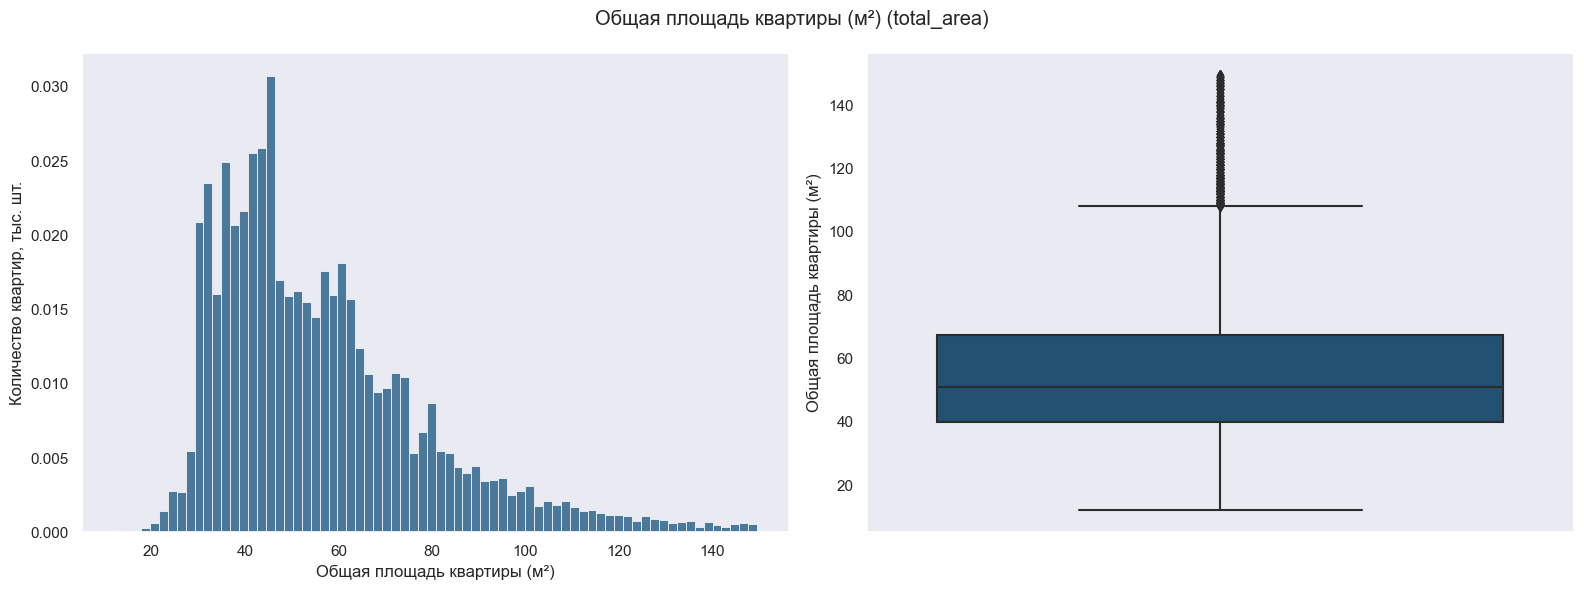

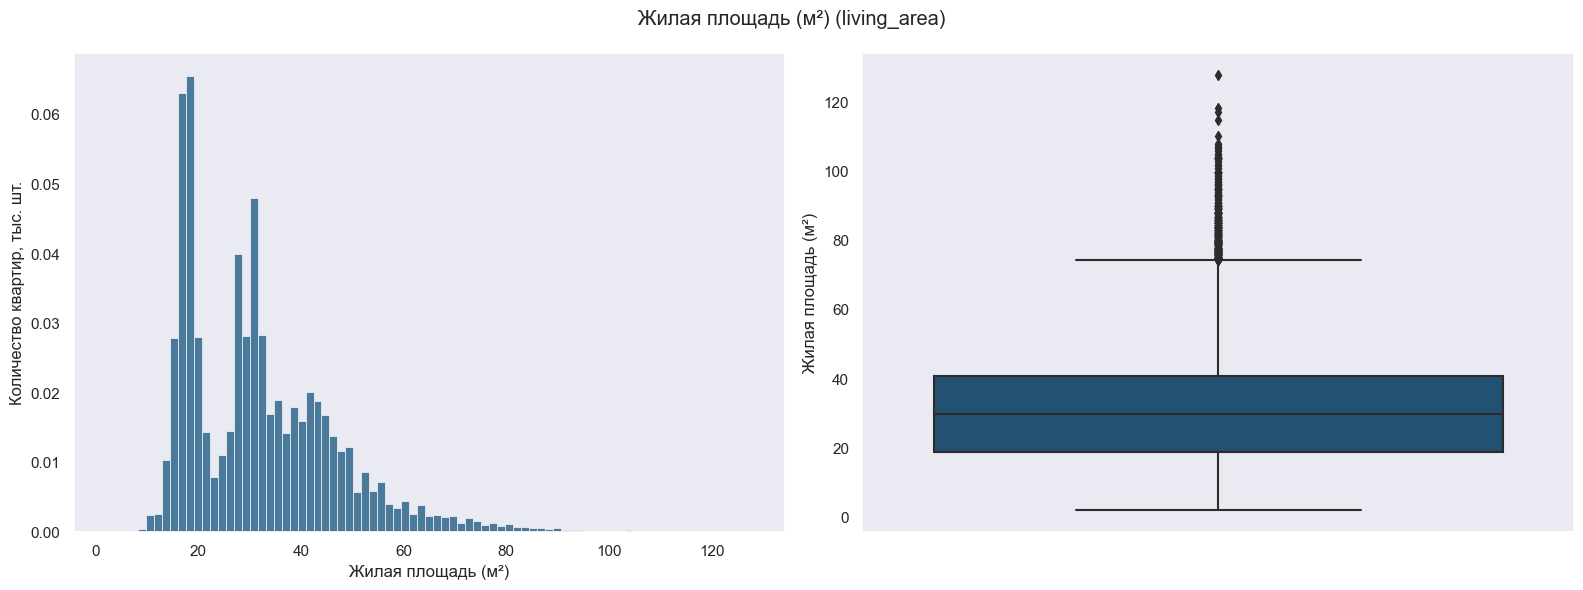

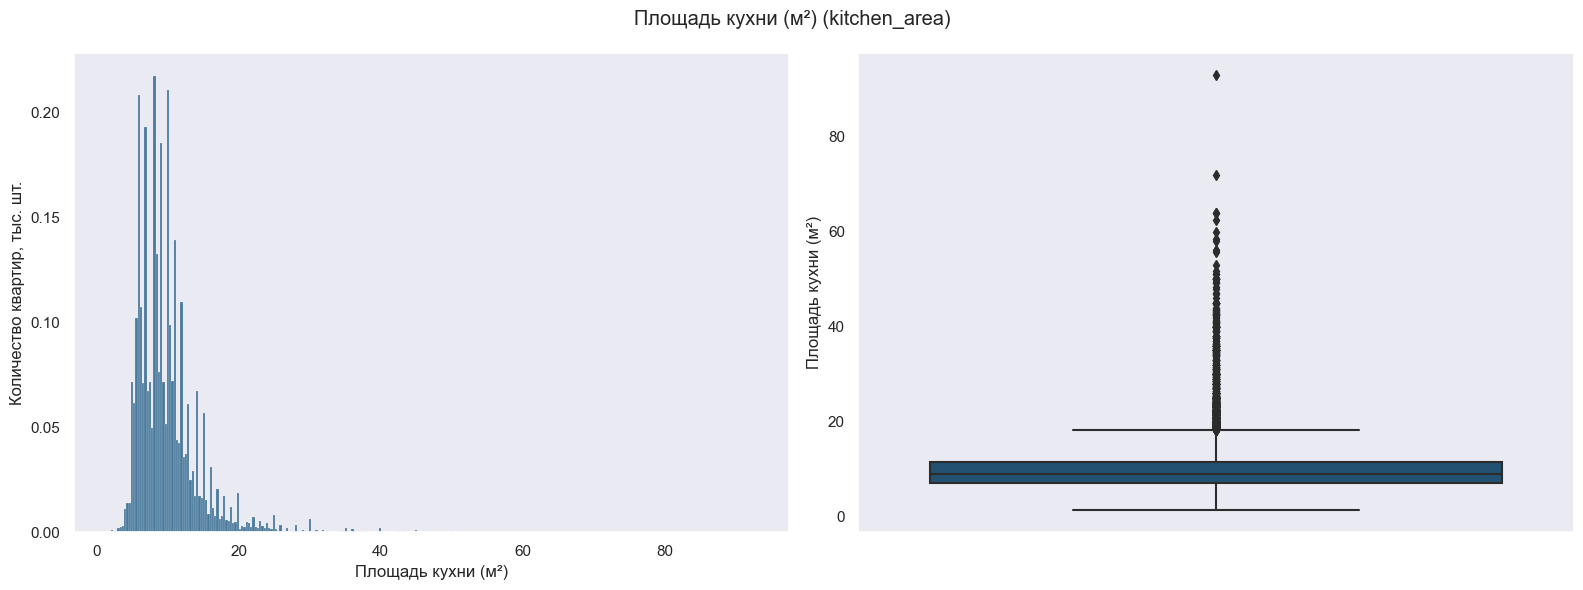

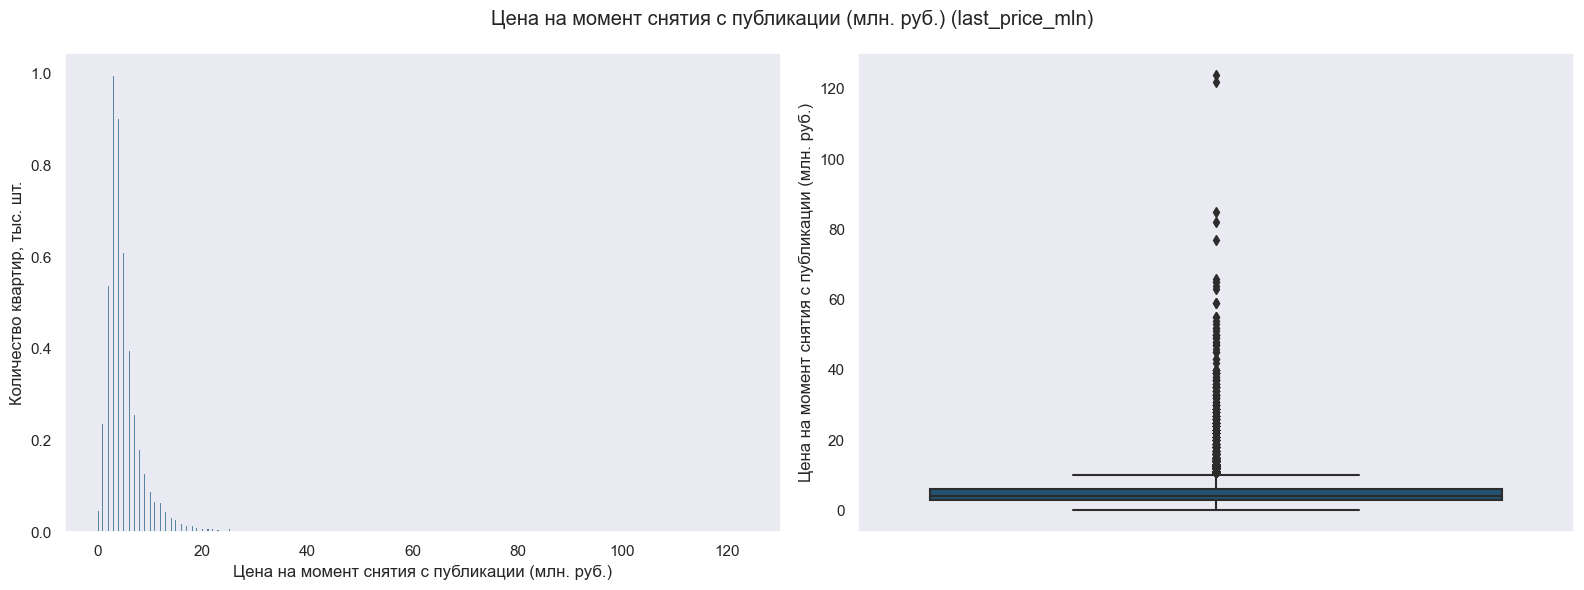

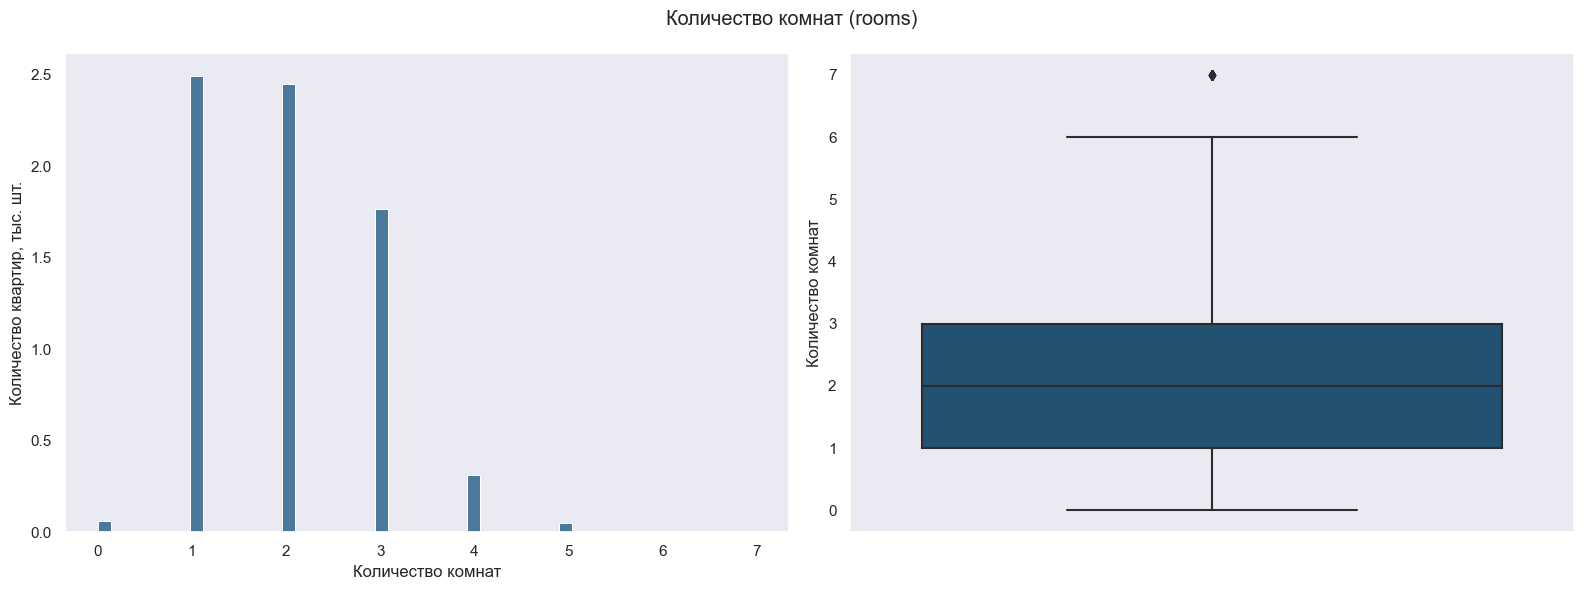

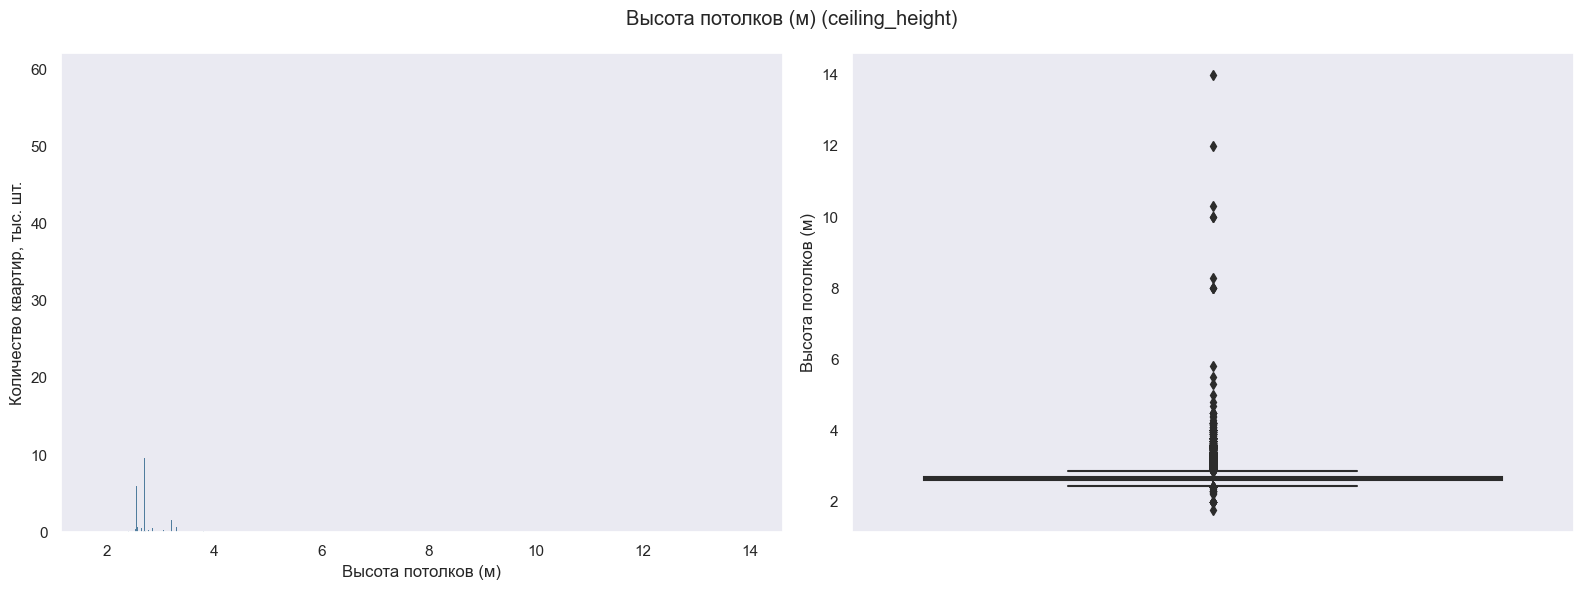

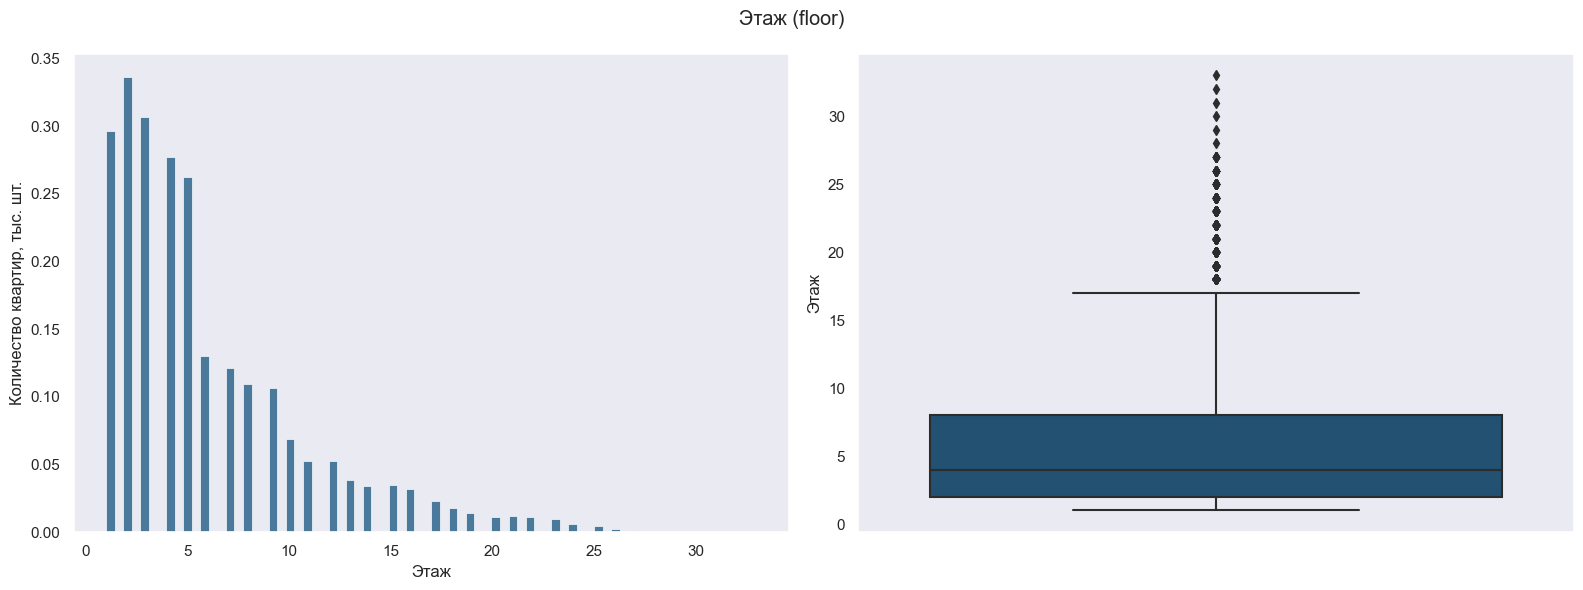

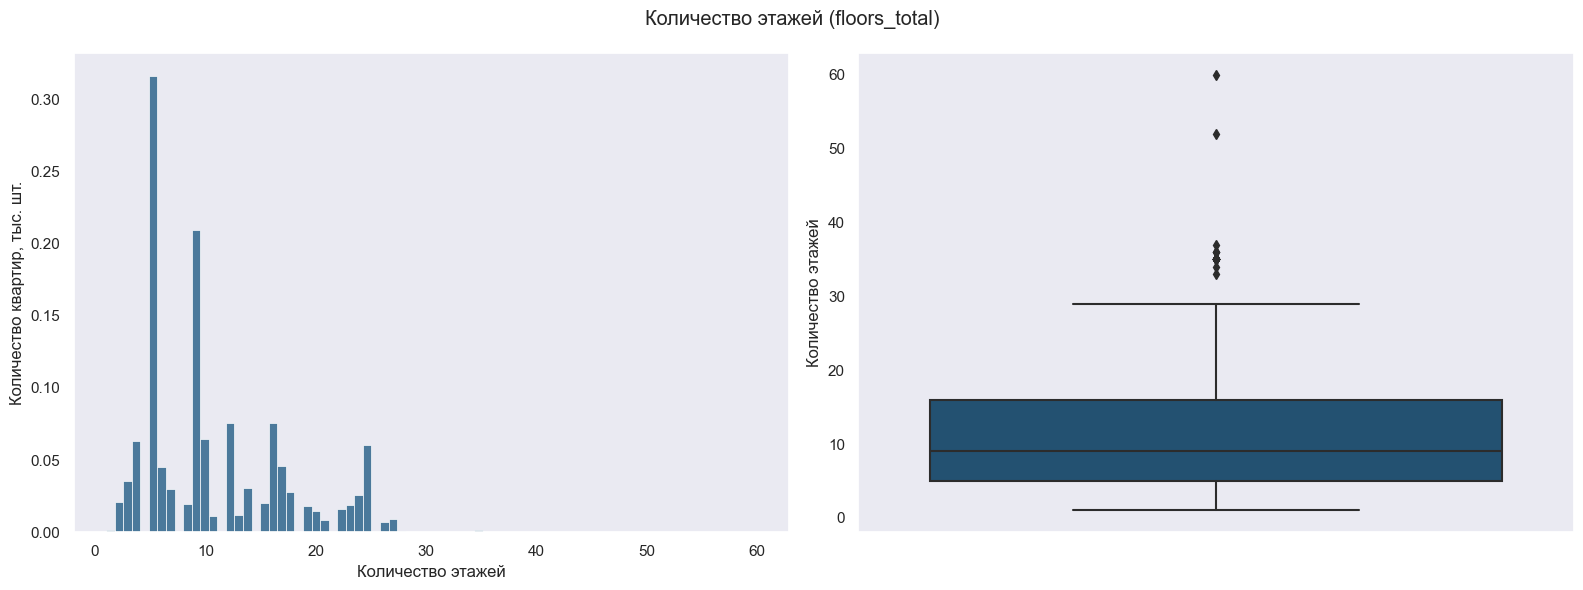

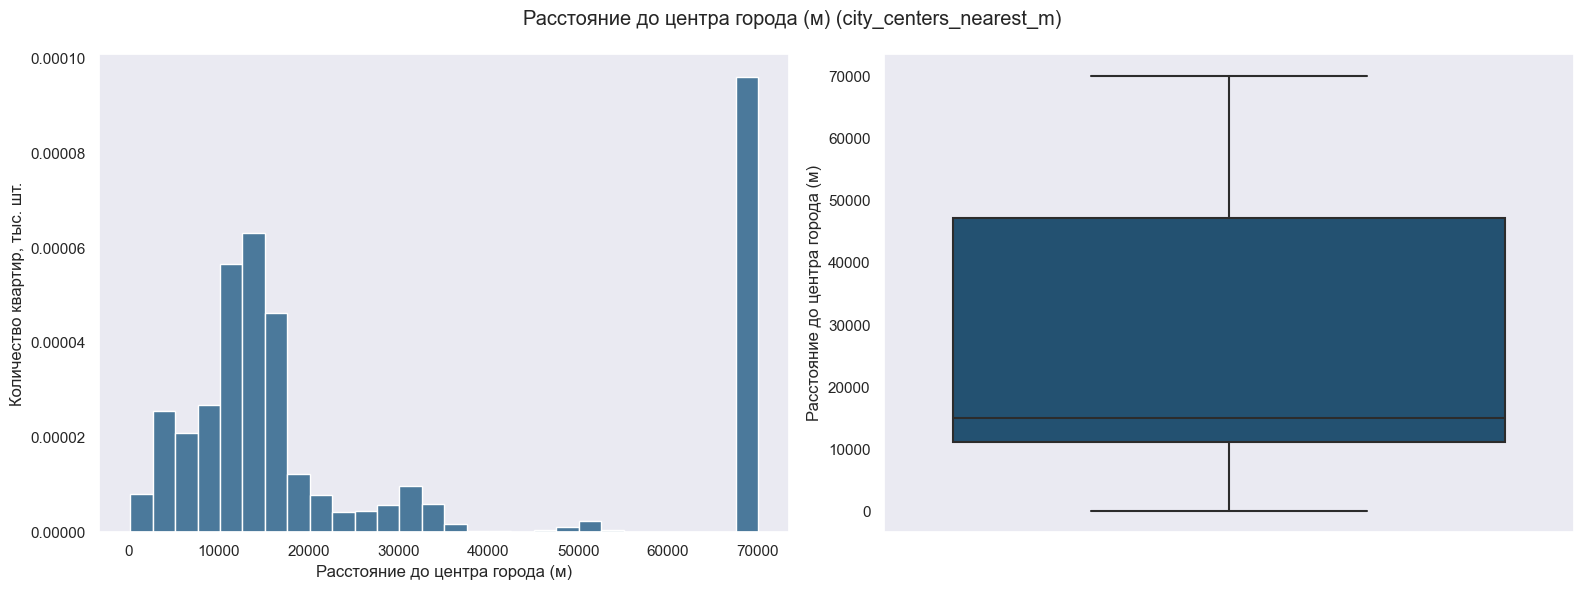

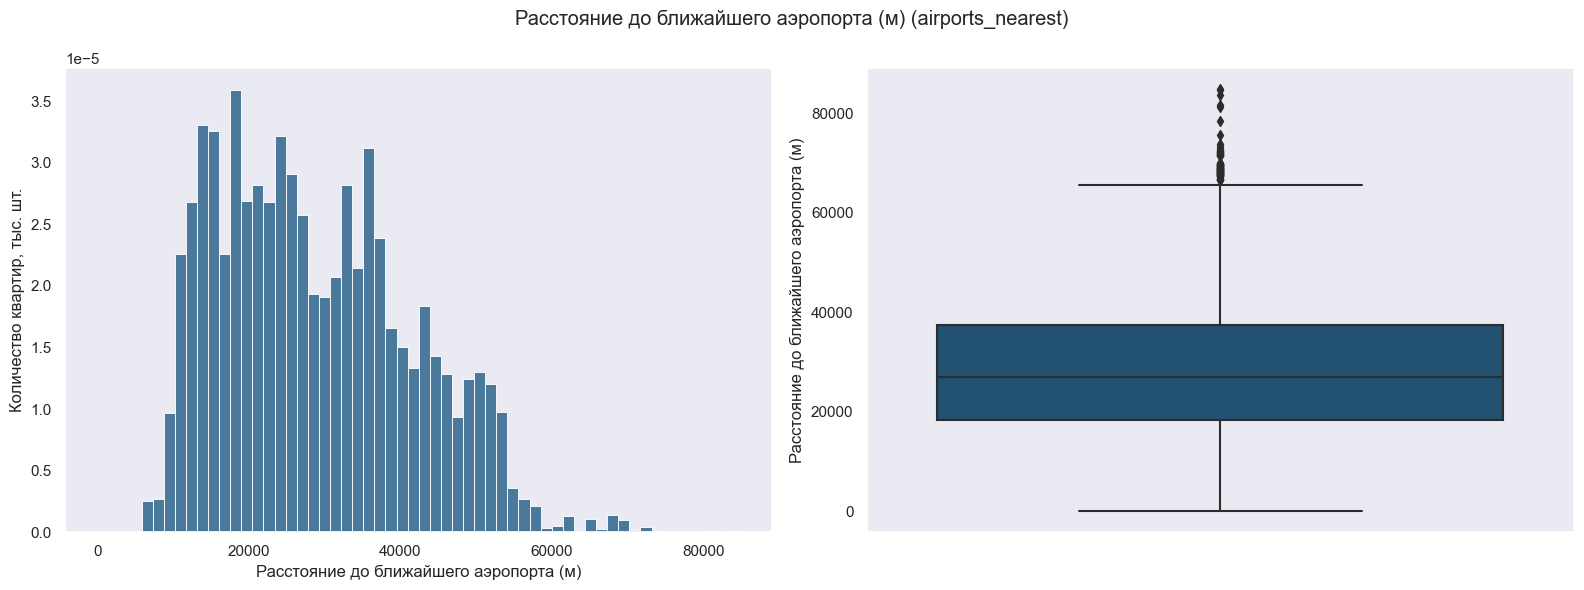

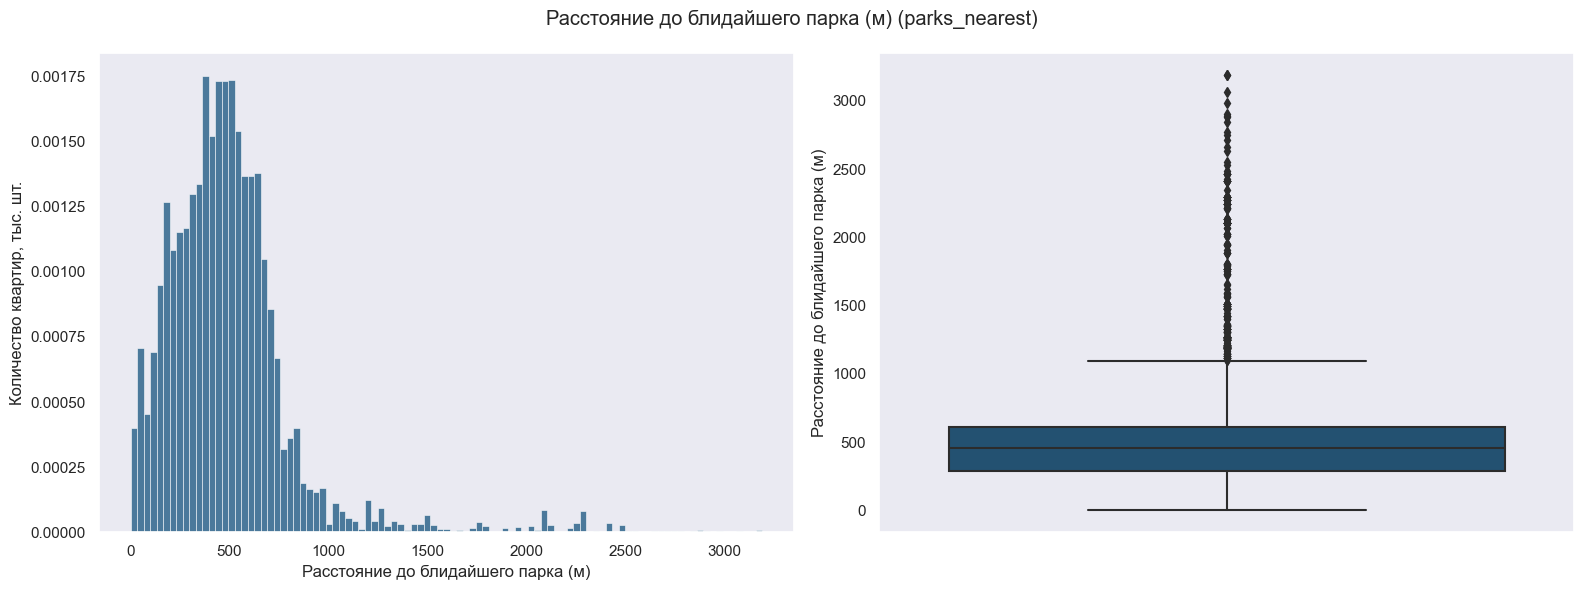

In [184]:
# применим функцию для количественных признаков
for column, column_name in quantity_dict.items():
     quantity_plot(df, column, column_name)

Гистограмма данных об общей площади квартир показывает практически нормальное распределение показателей. Наибольшее значение показателя характерно для квартир площадью около 45 кв.м. Также можно отметить пики на графике для значений 30 кв.м. и 55-61 кв.м. После значения 80 кв.м. идет плавное снижение количества квартир, что соответсвует действительности.

Гистограмма распределения жилой площади показала 2 пика. Максимальное значения характерно для площади 18 кв.м. Второй пик находится на значении в 30 кв.м. Небольшое резкое увеличение показателя характерно для значения 45 кв.м. Квартиры с жилой площадью более 80 кв.м. встречаются довольно редко.

Гистограмма распределения площади кухни имеет 3 пика. Самое распрастраненное значение площади составляет 10 кв.м. Второй пик расположен на значении 8 кв.м., третий - 12 кв.м. Основная масса квартир имеет площадь кухни от 6 до 16 кв.м. Кухни более 20 кв.м. встречаются довольно редко.

Гисторгамма распределения данных о цене квартир показывает 2 пика. Самая распространенная цена составляет около 3 млн. руб.
Второй пик характерен для значения - 4 млн. руб. После 5 млн. руб. идет плавное снижение показателя. Стоимость квартир после
30 млн. руб. практически не встречается.

Гистограмма распределения количества комнат в продаваемых квартирах позволяет сделать следующие выводы.
Самые распрастраненные для продажи однокомнатные квартиры. Далее по популярности идут двухкомнатыне квартиры. На третьем месте - 
трехкомнатные. Квартиры более чем с 4 комнатнами встречаются намного реже.

Гистограмма распредления данных о высоте потолков показала, что квартиры с высотой потолков 2,6 м наиболее популярны.
Основная доля продаваемых квартир имеет значение показателя от 2,5 до 3,1 м.
Высота более 4 м. встречается крайне редко.

График показывает, что основная доля квартир располагается на 2 этаже. Значительная доля квартир располагается еа 3,1,4 и 5 этаже.Начиная с 6 этажа распростарннность показателя постепенно снижается.

Основная доля продаваемых квартир, расположена в 5-этажных домах. На втором месте по популярности располагаются 9-этажные дома. Вывод логичен, так как данные постройки наиболее распространены в настоящее время. Стоит отметить увеличение показателя для 12-этажных, 16-этажных и 25-этажных домав. Дома с более 25 этажами встречаются крайне редко.

Гистограмма имеет 3 пика. Наиболее распростаненное растояние от цента - 15 тыс.м. Второй пик характерен для 12 тыс.м., третий - для 5 тыс.м. Основаная доля квартир отдалена от центра на расстоянии и 4 тыс.м. до 18 тыс.м. Удаленность более 35 тыс.м. встречается редко.

Гистрограмм распределения показателя имеет множество пиков. Основная доля квартир располагается от аэропрта на расстоянии от 10 тыс.м. до 55 тыс.м. Максимальное распространение характерно для расстояния 19 тыс.м. Также пики присутствуют у значений 36 тыс.м., 25 тыс.м., 14-15 тыс.м.,33 тыс.м., 40 тыс.м., 42 тыс.м. и 52 тыс.м. Квартиры, удаленные от аэропорта на более 55 тыс.м., встречаются редко. 

Сложно сделать объективный вывод по данной гистограмме в связи с наличием большого числа пропусков в этих данных (15178). 
Однако по данным, которые присутствуют в выборке, видно, что основная масса квартир располагается в 0-700 м. от парков. На гистограмме пик приходится на значение 490 м. Квартиры, удаленные от парков на 900 м и более, встречаются редко.

Text(0, 0.5, 'Количество квартир, шт.')

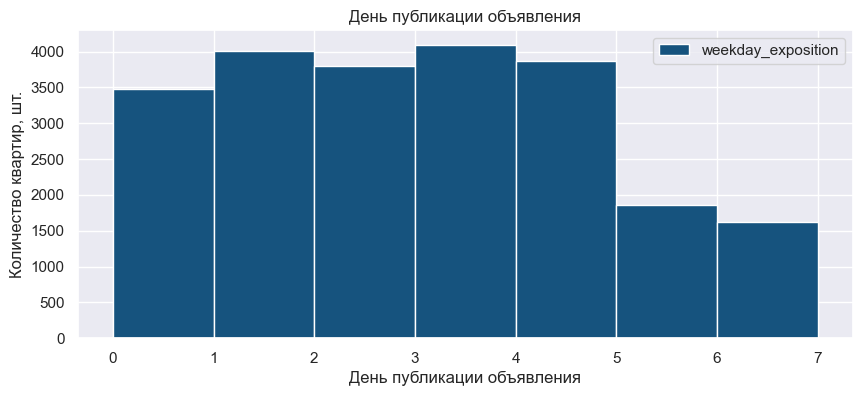

In [185]:
# изучим день публикации объявления
df.plot(
    y='weekday_exposition', 
    kind='hist',
    range=(0, 7),
    bins = 7,
    grid = True,
    title = 'День публикации объявления',
    figsize = (10,4)
)
plt.xlabel('День публикации объявления')
plt.ylabel('Количество квартир, шт.')

График позволяет сделать вывод о том, что в основном объявления о продаже квартир размещаются в будние дни. В выходые дни показатель практически вдвое меньше. Среди будних дней наиболее популярны четверг и вторних. Однако стоит отметить, что разница очень мала.

Text(0, 0.5, 'Количество квартир, шт.')

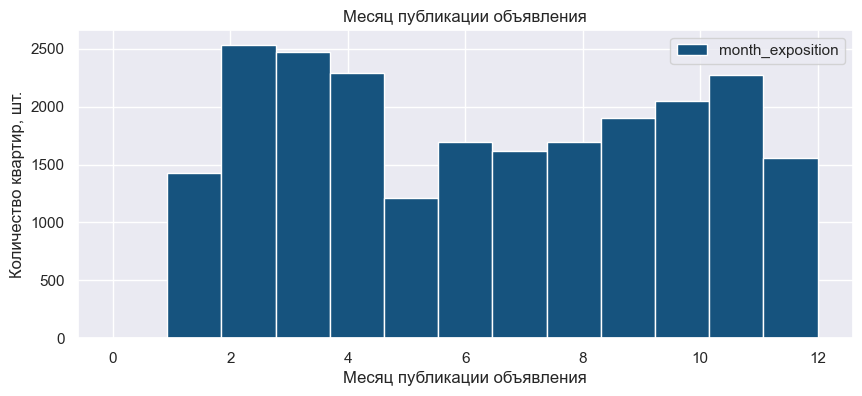

In [186]:
# изучим месяц публикации объявления
df.plot(
    y='month_exposition', 
    kind='hist',
    range=(0, 12),
    bins = 13,
    grid = True,
    title = 'Месяц публикации объявления',
    figsize = (10,4)
)
plt.xlabel('Месяц публикации объявления')
plt.ylabel('Количество квартир, шт.')

График показывает, что наибоее популярными месяцами для размещения объявления явлются февраль, март и апрель (по уменьшению показателя). Скачок характерен для ноября, октября и сентября. Стоит отметить, что в январе нет ни одного размещенного объявления.

---
<a id='eda2'></a> 
### Изучение скорости продажи квартир
[Назад к оглавлению](#contens)

In [187]:
# изучим скорость продажи квартир
# в связи с тем, что в выборке изначально было большое количество пропусков (более 3 тыс.), которые мы заменили 0
# при анализе не будем их учитывать
df.loc[df['days_exposition'] !=0, 'days_exposition'].describe()

count   19,703.00
mean       165.13
std        185.89
min          1.00
25%         44.00
50%         92.00
75%        217.00
max        999.00
Name: days_exposition, dtype: float64

Text(0, 0.5, 'Количество квартир, шт.')

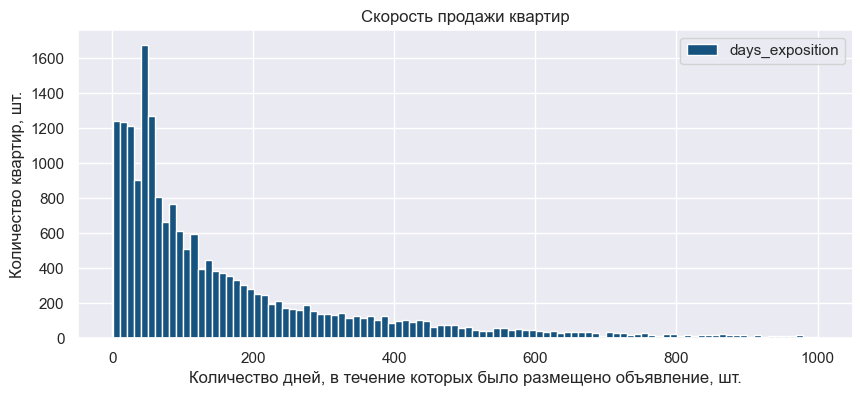

In [188]:
# построим гистограмму для всего диапазона значений
df.plot(
    y='days_exposition', 
    kind='hist',
    range=(1, 1000),
    bins = 100,
    grid = True,
    title = 'Скорость продажи квартир',
    figsize = (10,4)
)
plt.xlabel('Количество дней, в течение которых было размещено объявление, шт.')
plt.ylabel('Количество квартир, шт.')

Text(0, 0.5, 'Количество квартир, шт.')

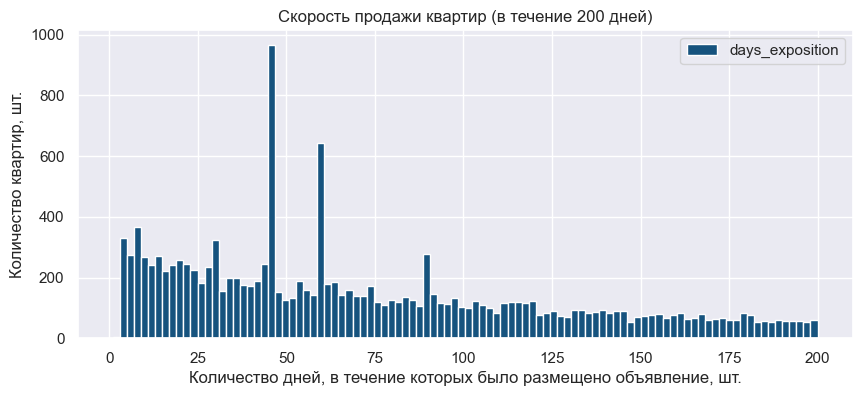

In [189]:
# построим гистограмму для диапазона от 1 до 200 дней для более подробного анализа
df.plot(
    y='days_exposition', 
    kind='hist',
    range=(1, 200),
    bins = 100,
    grid = True,
    title = 'Скорость продажи квартир (в течение 200 дней)',
    figsize = (10,4)
)
plt.xlabel('Количество дней, в течение которых было размещено объявление, шт.')
plt.ylabel('Количество квартир, шт.')

Статистические показатели (среднее и медиана) имют существенную разницу, 165 и 92 дня соответственно. Первый график показывает, что основная доля квартир продается в течение 200 дней. Более подробный анализ, отраженный на втором графике, показал, что чаще всего квартиры продаются в течение 45, 60 и 90 дней. 
Считаю, что срок в 45 дней можно назвать быстрым для продажи квартиры, значения более 200 дней - долгими.

---
<a id='eda3'></a> 
### Анализ факторов влияния на стоимость объекта
[Назад к оглавлению](#contens)

Коэффициент корреляции: 0.69


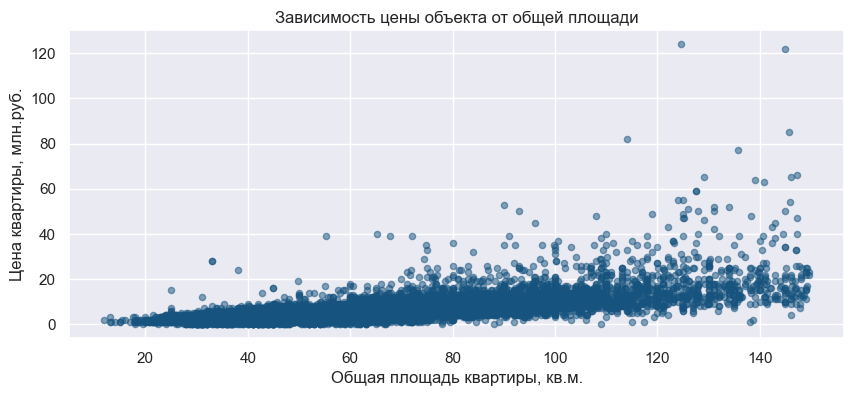

In [190]:
# проанализируем зависимость цены объекта от общей площади 
# построим диаграмму рассеивания
df.plot(x='total_area',
        y='last_price_mln',
        kind='scatter',
        grid = True,
        style = 'o',
        title = 'Зависимость цены объекта от общей площади',
        alpha = 0.5,
        figsize = (10, 4))
plt.xlabel('Общая площадь квартиры, кв.м.')
plt.ylabel('Цена квартиры, млн.руб.')

# посчитам коэффициент корреляции
corr_total_area = df['total_area'].corr(df['last_price_mln'])
print(f'Коэффициент корреляции: {corr_total_area:.2}')

Высокое значение коэффициента корреляции (довольно близко к 1) позволяет сделать вывод о том, что существует устойчивая связь между ценой квартиры и общей площадью. Диаграмма рассивания подтверждает данный вывод: с увеличение площади объекта растет и его стоимость.

Коэффициент корреляции: 0.58


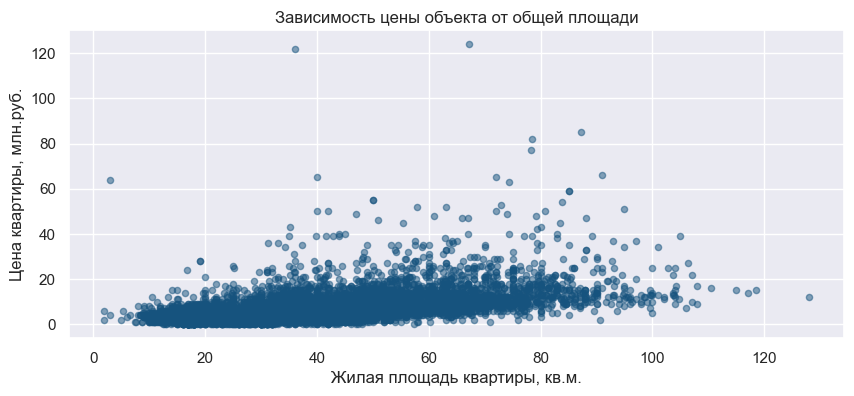

In [191]:
# проанализируем зависимость цены объекта от жилой площади 
# построим диаграмму рассеивания
df.plot(x='living_area',
        y='last_price_mln',
        kind='scatter',
        grid = True,
        style = 'o',
        title = 'Зависимость цены объекта от общей площади',
        alpha = 0.5,
        figsize = (10, 4))
plt.xlabel('Жилая площадь квартиры, кв.м.')
plt.ylabel('Цена квартиры, млн.руб.')

# посчитам коэффициент корреляции
corr_living_area = df['living_area'].corr(df['last_price_mln'])
print(f'Коэффициент корреляции: {corr_living_area:.2}')

Коэффициент корреляции цены квартиры и жилой площади немного ниже предыдущего значения, но также указвает на наличие зависимости. На диаграмме рассеивания также это отражено.

Коэффициент корреляции: 0.56


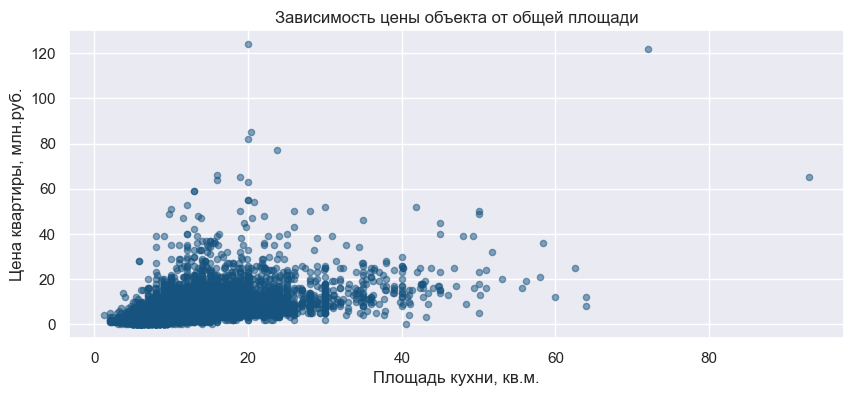

In [192]:
# проанализируем зависимость цены объекта от площади кухни
# построим диаграмму рассеивания
df.plot(x='kitchen_area',
        y='last_price_mln',
        kind='scatter',
        grid = True,
        style = 'o',
        title = 'Зависимость цены объекта от общей площади',
        alpha = 0.5,
        figsize = (10, 4))
plt.xlabel('Площадь кухни, кв.м.')
plt.ylabel('Цена квартиры, млн.руб.')

# посчитам коэффициент корреляции
corr_kitchen_area = df['kitchen_area'].corr(df['last_price_mln'])
print(f'Коэффициент корреляции: {corr_kitchen_area:.2}')

Коэффициент корреляции цены объекта и площади кухни находится практически на уровне корреляции стоимости от жилой стоимости. Также с увеличением площади кухни увеличивается и цена квартиры.

Коэффициент корреляции: 0.4


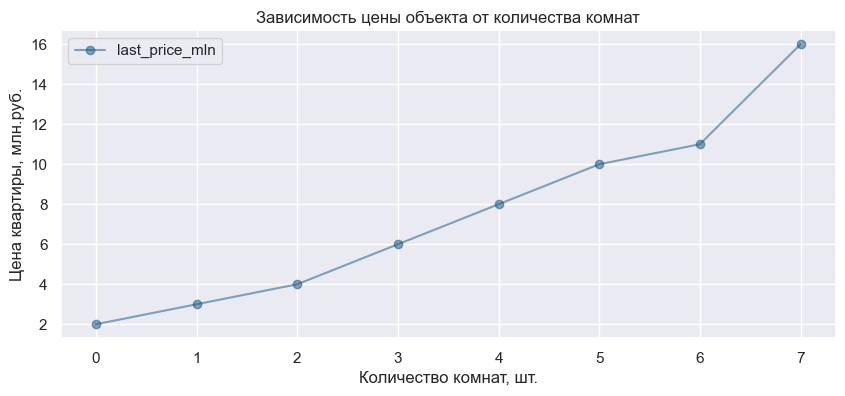

In [193]:
# проанализируем зависимость цены объекта от количества комнат
# построим диаграмму рассеивания
(df
    .pivot_table(index='rooms', values='last_price_mln', aggfunc='median')
    .plot(grid = True,
           style = 'o-',
           title = 'Зависимость цены объекта от количества комнат',
           alpha = 0.5,
           figsize = (10, 4))
)
plt.xlabel('Количество комнат, шт.')
plt.ylabel('Цена квартиры, млн.руб.')

# посчитам коэффициент корреляции
corr_rooms = df['rooms'].corr(df['last_price_mln'])
print(f'Коэффициент корреляции: {corr_rooms:.2}')

Диаграмма рассеивания и коэффициент корреляции цены объекта и количества комнат позволяют сделать вывод о наличии зависимости между данными показателями. Однако связь между ними немного ниже предыдущих зависимостей.

<Axes: >

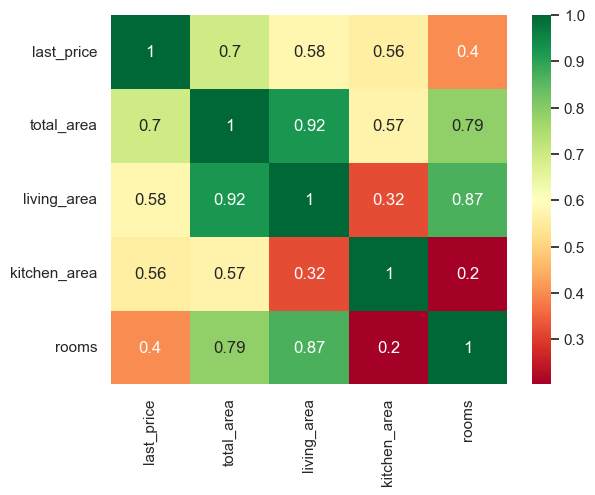

In [194]:
# построим общую тадлицу коэффициентов корреляции для удобства обобщения результатов анализа в выводе
corr_table = df[['last_price',
           'total_area',\
           'living_area',\
            'kitchen_area',\
            'rooms']].corr()
corr_table.style.format('{:.2f}')
sns.heatmap(corr_table, annot=True, cmap='RdYlGn') 

Text(0, 0.5, 'Цена квартиры, млн.руб.')

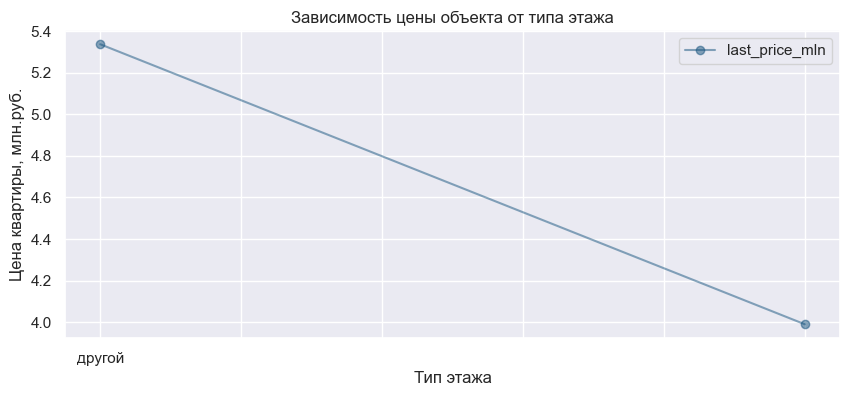

In [195]:
# проанализируем зависимость цены объекта от типа этажа, на котором расположен объект
# построим диаграмму рассеивания
(df
     .pivot_table(index='type_floor', values='last_price_mln')
     .plot(grid = True,
           style = 'o-',
           title = 'Зависимость цены объекта от типа этажа',
           alpha = 0.5,
           figsize = (10, 4))
)
plt.xlabel('Тип этажа')
plt.ylabel('Цена квартиры, млн.руб.')

Диаграмма показывает, что квартиры, расположенные на первом этаже продаются значительно дешевле остальных.

Text(0, 0.5, 'Цена квартиры, млн.руб.')

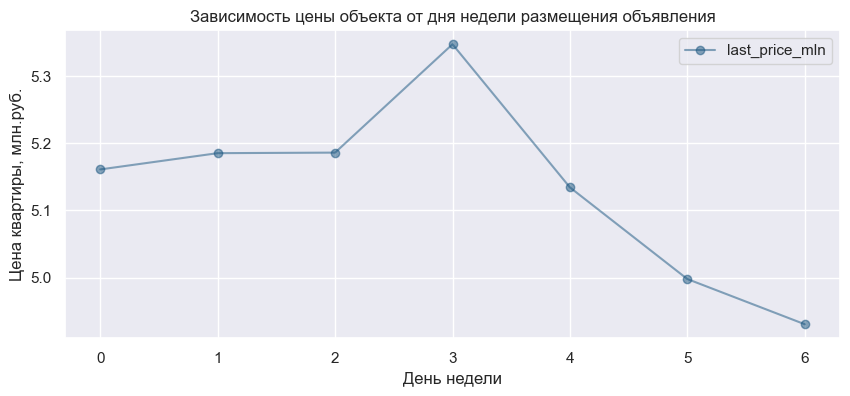

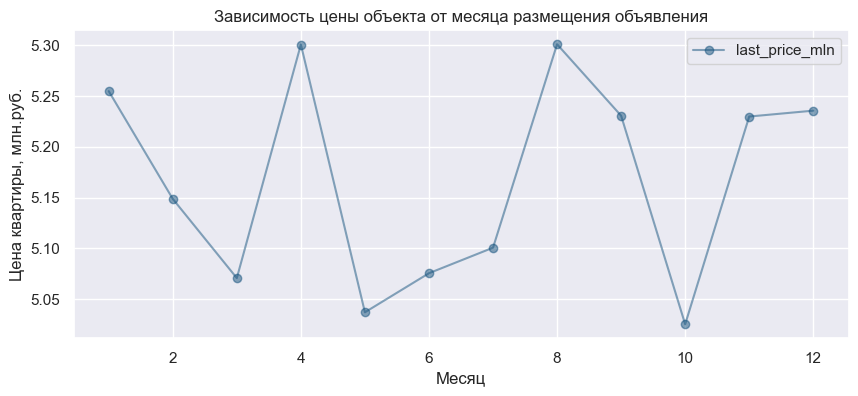

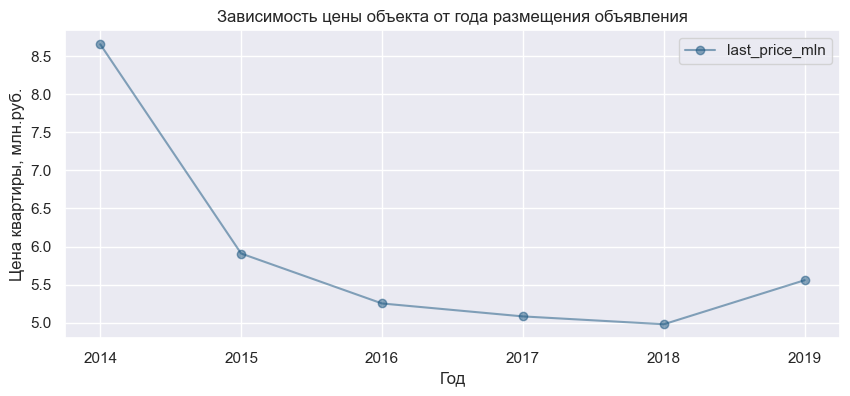

In [196]:
# изучим зависимость цены объекта от даты размещения объявления
# проанализируем зависимость цены объекта от дня недели размещения объявления
# построим диаграмму рассеивания
(df
     .pivot_table(index='weekday_exposition', values='last_price_mln')
     .plot(grid = True,
           style = 'o-',
           title = 'Зависимость цены объекта от дня недели размещения объявления',
           alpha = 0.5,
           figsize = (10, 4))
)
plt.xlabel('День недели')
plt.ylabel('Цена квартиры, млн.руб.')

# проанализируем зависимость цены объекта от месяца размещения объявления
# построим диаграмму рассеивания
(df
     .pivot_table(index='month_exposition', values='last_price_mln')
     .plot(grid = True,
           style = 'o-',
           title = 'Зависимость цены объекта от месяца размещения объявления',
           alpha = 0.5,
           figsize = (10, 4))
)
plt.xlabel('Месяц')
plt.ylabel('Цена квартиры, млн.руб.')

# проанализируем зависимость цены объекта от года размещения объявления
# построим диаграмму рассеивания
(df
     .pivot_table(index='year_exposition', values='last_price_mln')
     .plot(grid = True,
           style = 'o-',
           title = 'Зависимость цены объекта от года размещения объявления',
           alpha = 0.5,
           figsize = (10, 4))
)
plt.xlabel('Год')
plt.ylabel('Цена квартиры, млн.руб.')

Анализ зависимости цены объекта от даты размещения объявления о ее продаже показал следующее:
- в четверг размещаются объявления о самых дорогих квартирах, в воскресенье - о самых дешевых;
- апрель и август характеризуются размещением информации о продаже самых дорогих объектов, октябрь, май и март - наоборот, самых дешевых;
- после 2014 годы стоимость квартир значительно снизилась и продолжала плавно уменьшаться до 2018 года. Для 2019 года характерен рост показателя.

In [197]:
# изучим среднюю цену одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений.
group_locality_name = df.pivot_table(index='locality_name', values='price_square_m', aggfunc=['count', 'mean', 'median'])
group_locality_name.columns = ['count', 'mean', 'median']
ten_locality_name = group_locality_name.sort_values(by='count', ascending=False).head(10)
ten_locality_name.style.format('{:.0f}')

In [198]:
# отсортируем данные список по медианной цене для удобства анализа
ten_locality_name = ten_locality_name.sort_values(by='median', ascending=False).head(10)
ten_locality_name.style.format('{:.0f}')

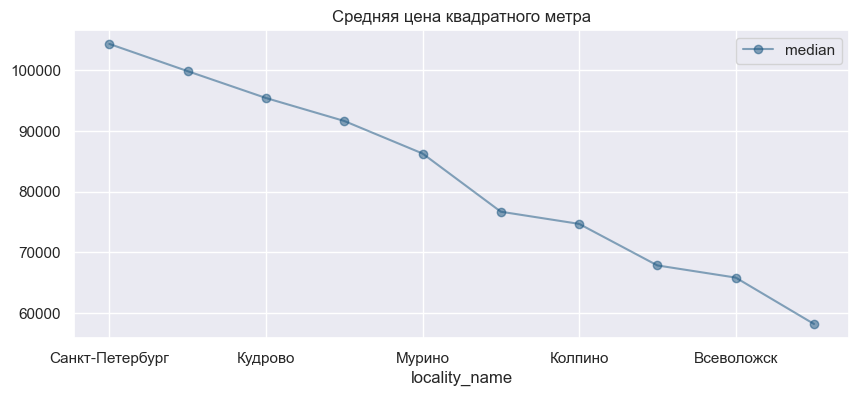

In [199]:
# построим график
axs = ten_locality_name.plot(
        y= 'median',
        grid = True,
        style = 'o-',
        title = 'Средняя цена квадратного метра',
        alpha = 0.5,
        figsize = (10, 4))

В таблице выделены 10 населенных пунктов с наибольшим числом размещенных объявлений о продаже квартиры. Логично, что лидирует Санкт-Петербург. Средняя цена квадратного метра в городе также максимальная. На втором и третьих местах расположились Пушкин и Кудрово. Самая низкая цена во Всеволожске и Выборге.

Text(0, 0.5, 'Сердняя цена квартиры, млн.руб.')

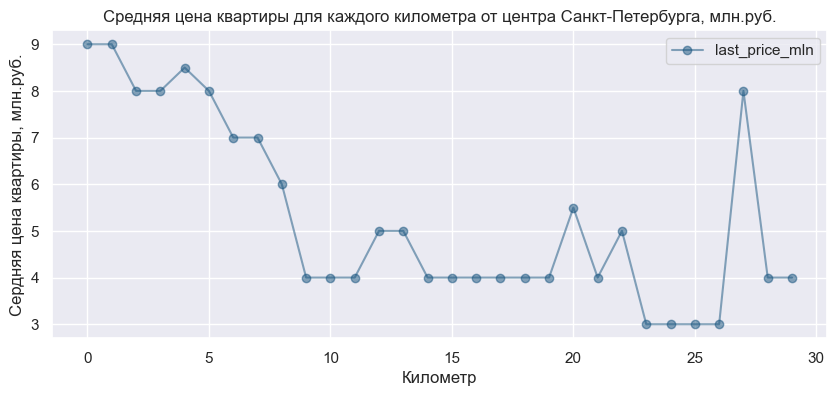

In [200]:
# расcмотрим квартиры, расположенные в Санкт-Петербурге
# так как отсутсвующие значения мы заменяли 70, уберем их из рассматриваемой выборки
# рассчитаем среднюю цену квартир для каждого километра от центра города и построим график
df_spb = df.query('locality_name == "Санкт-Петербург"')
(df_spb
    .query('city_centers_nearest_km != 70')
    .pivot_table(index='city_centers_nearest_km', values='last_price_mln', aggfunc='median')
    .plot(grid = True,
          style = 'o-',
          title = 'Средняя цена квартиры для каждого километра от центра Санкт-Петербурга, млн.руб.',
          alpha = 0.5,
          figsize = (10, 4))
)
plt.xlabel('Километр')
plt.ylabel('Сердняя цена квартиры, млн.руб.')


In [201]:
df.query(('locality_name == "Санкт-Петербург"') and ('city_centers_nearest_km != 70'))['locality_name'].value_counts()

Санкт-Петербург    14866
Шушары               432
Пушкин               353
Колпино              334
Парголово            325
Петергоф             193
Сестрорецк           180
Красное Село         171
Ломоносов            131
Кронштадт             92
Металлострой          66
Стрельна              41
Павловск              34
Зеленогорск           23
Понтонный             20
Саперный               6
Песочный               4
Молодежное             3
Лисий Нос              2
Репино                 2
Усть-Ижора             2
Петро-Славянка         1
Левашово               1
Белоостров             1
Александровская        1
Name: locality_name, dtype: int64

График показал, что удаленность от центра города действиельное влияет на среднюю стоимость квартир. Однако, данное правило распространятся только на первые 9 км., на которых средняя цена снижается по степени удаленности от центра. После 9 км. до 26 км. цена не сильно измененяется (-+1,5 млн.) и практически остается на уровне 4 млн.руб. Средняя стоимость для каждого километра можно определить по графику. Для 27 км. характерен резкий скачок цены. Это может быть связано с довольно высокой ценой квартир в престижных районах города, которые достаточно отдалены от центра (например, Курортный, Петродворцовый).

In [202]:
df['city_centers_nearest_km'].describe()

count   22,726.00
mean        27.36
std         25.06
min          0.00
25%         11.00
50%         15.00
75%         47.00
max         70.00
Name: city_centers_nearest_km, dtype: float64

---
**Вывод:**
    
В процессе исследовальтельского анализа данных былы проанализированы и выявлены самые распространненые показатели среди данных об общей, жилой и площади кухни, цене продажи, количестве комнат, высоте потолков, этаже, расстояний от центра, парков и аэропорта. Изучена скорость продажи квартир, выявлены быстрые и долгие сроки. Проведен факторный анализ стоимости продажи квартир. Выявлен топ 10 населенных пунктов с наибольшим числом размещенных объявлений. В них была исследована срелняя цена 1 квадратного метра. Определена средняя стоимость объектов недвижимости для каждого километра удаленности от центра города Санкт-Петербурга.

___

---
<a id='conclution'></a> 
### Выводы и рекомендации
[Назад к оглавлению](#contens)

В результате выполнения проекта была достигнута цель исследования – изучена средняя цена объектов недвижимости и проведен ее факторный анализ.
Для проведения исследования были устранены пропуски, дубликаты, аномальные значения в данных, изменен тип данных, проведены расчеты дополнительных показателей.

По результатам исследования можно сделать следующие выводы:
1.	Чаще всего продаются квартиры площадью около 45 кв.м., 30 кв.м., и 55-61 кв.м. (по уменьшению популярности).
2.	Наиболее часто встречающаяся цена продажи квартир варьируется от 3 до 4 млн. руб.
3.	Объявления о продаже однокомнатных квартир встречаются чаще. Двух- и трехкомнатные квартиры продаются немного реже.
4.	Средняя высота потолков составляет от 2,5 до 3,1 м.
5.	2 и 3 этаж наиболее популярен при продаже квартир. А самыми распространенными домами, в которых продаются квартиры, являются 5, 9, 16 и 25 этажные (по уменьшению распространения).
6.	Основная доля квартир отдалена от центра на расстоянии и 4 тыс.м. до 18 тыс.м., то есть расположена в черте города Санкт-Петербурга.
7.	Обычно объявления о продаже размещаются в будние дни, а среди месяцев прослеживается сезонность: популярными месяцами являются февраль, март и ноябрь, октябрь, сентябрь.
8.	Обычно квартиры продаются в течение 200 дней. Быстрым сроком продажи является период в 45 дней.
9.	На цену продажи квартиры оказывает большее влияние общая площадь (в т.ч. жилая и площадь кухни), и в меньшей степени количество комнат. Квартиры на  этаже продаются значительно дешевле остальных.
10.	Объявления о самых дорогих квартирах размещаются в четверг и воскресенья апреля и августа, а самых дешевых – в воскресенье октября, мая и марта. 
11.	После 2014 годы стоимость квартир значительно снизилась и продолжала плавно уменьшаться до 2018 года. Для 2019 года характерен рост показателя.
12.	 В Санкт-Петербурге степень удаленности от центра незначительно влияет на среднюю стоимость квартиры. 
13.	Среди 10населенных пунктов, в которых наиболее часто продаются квартиры, лидирует Санктн-Петербрг. Средняя цена квадратного метра в городе также максимальная (104 357 руб.). Самая низкая цена в Выборге (58133).

___